In [ ]:
# 深度学习 基于Python的理论与实践

In [ ]:
# 第一章 Python入门 略过

# Python介绍
# 环境配置
# 基本数据类型
# 流程控制
# Numpy
# Matplotlib

In [ ]:
# 第二章 感知机
# perception

In [ ]:
# 2.1
# 感知机：接收多个输入信号 输出一个信号
# 输入信号x1
# 输出信号
# 权重w
# 阈值theta

In [ ]:
# 2.2
# 通过感知机实现简单的逻辑电路
# 与门AND  全为1则输出1
# 与非门NAND   存在0就输出1   和AND相反
# 或门    存在1就输出1

In [ ]:
# 2.3
# 感知机的实现
# AND
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0.5
    else:
        return 1

In [ ]:
# 偏置b
# 使用权重和偏置实现AND
import numpy as np
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b# 矩阵相乘（对应元素相乘，和线性代数的矩阵相乘不同）对矩阵元素求和
    if tmp <= 0:
        return 0
    else:
        return 1
# 与非门
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1
# 或门
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1


In [ ]:
# 2.4
# 感知机的局限性
# 异或门XOR   输入x1 x2相同输出0 不同输出1

# 线性和非线性


In [ ]:
# 2.5
# 多层感知机

# 通过组合AND NAND OR实现XOR
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)

In [ ]:
# 2.6
# 从XOR到计算机

In [ ]:
# 第三章 神经网络
# 权重的设置 从人工到自动设置   -> 从感知机到神经网络


In [ ]:
# 3.1
# 输入层
# 输出层
# 中间层（隐藏层）
# 本书从输入层开始 从0开始编号

# 激活函数
# 神经元 （节点）

In [ ]:
# 3.2
# 激活函数

# sigmod函数  h(x) = 1 / 1 + exp(-x)

In [ ]:
# 阶跃函数的实现 

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

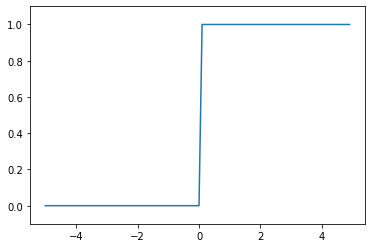

In [1]:
#画出该函数图像
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)# np.arange(start, end, step) 默认起点为0，默认步长step=1  返回一个从start->end 步长=step的序列
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)# 指定y轴范围
plt.show()

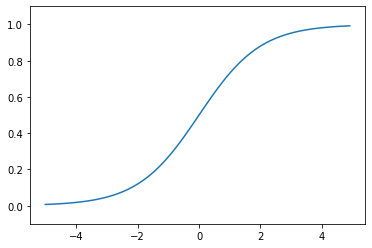

In [2]:
# sigmod()函数实现 以及其图形
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
# 阶跃函数和sigmod函数比较
# 平滑性
# 输出值
# 宏观相似性
# 两者都是非线性函数

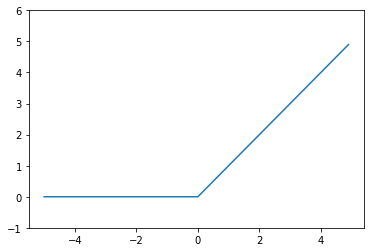

In [7]:
# ReLU函数
import numpy as np
import matplotlib.pylab as plt

def ReLU(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)
plt.plot(x, y)
plt.ylim(-1, 6)
plt.show()

In [ ]:
# 3.3
# NumPy 多维数组运算

In [ ]:
# 神经网络的內积
# 通过矩阵乘法进行神经网络计算
# X   W   =   Y

In [9]:
# 3.4
# 3层神经网络的实现
import numpy as np

def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmiod(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [ ]:
# 3.5 输出层设计
# 分类问题 回归问题
# softmax函数
import numpy as np

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

# 防止溢出
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [2]:
# 3.6
# 手写数字识别
# 通过本书提供的mnist.py脚本下载实验数据 需要文件notebookDL的父目录名称为ch01...8
# 后面看看怎么修改mnist.py弄掉这个限制
# 暂时先把模型跑起来再说
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
# 第一次调用会下载实验数据
# (训练图像，训练标签), (测试图像，测试标签)
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# 输出各个数据的shape
print(x_train.shape)#(60000, 784)
print(t_train.shape)#(60000,)
print(x_test.shape)#(10000, 784)
print(t_test.shape)#(10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

# flatten=True表示读入的图像数据以一列（一维）NumPy数组的形式保存
# normalize=False表示不将输入图像归一化到0.0 - 1.0  输入图像的像素会保持原来的0-255
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]

print(label)# 5
print(img.shape)# (784, )
img = img.reshape(28, 28)# 为了show image，需要将数据变为二维数组的形状
print(img.shape)# (28, 28)

img_show(img)

5
(784,)
(28, 28)


In [6]:
# 神经网络的推理处理
# 输入层：输入一张图片 24*24 = 728 个神经元
# 输出层：输出的结果0-9 共有10个类别
# 两个隐藏层：第一个隐藏层50个神经元 第二个隐藏层100个神经元

import pickle

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:# 假设学习已经完成 直接读取直接已经学习到的模型
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    #print(W1.shape)  (784, 50)
    #print(W2.shape)  (50, 100)
    #print(W3.shape)  (100, 10)
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

x, t = get_data()

#print(x.shape) (10000, 784)
#print(x[0].shape) (784, )

network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)# 获取概率最高元素索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [7]:
# 批处理
x, t = get_data()
network = init_network()

batch_size = 100# 批处理数量
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [1]:
# 第四章
# 从训练数据中自动获取最优权重参数

In [ ]:
# 4.1
# 从数据中学习
# 求解一个问题的答案 使用算法、机器学习、深度学习得到答案的过程的区别 显示了这三种方式的区别
# 泛化能力
# 拟合问题 过拟合 欠拟合

In [1]:
# 4.2
# 损失函数
# 损失函数表示神经网络性能的恶劣程度 对其加上负号 就可以来表示 性能有多好

import numpy as np

# 均方误差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

# 交叉熵误差
def cross_entropy_error(y, t):
    delta = 1e-7 # 注意此处为0.0000001 用于防止出现np.log(0)时出现的无穷小 防止出现-inf后无法继续计算
    return -np.sum(t * np.log(y + delta))

In [4]:
# mini-batch 小批量 从大量的训练数据中选出一批数据
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)# 随机选取
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

#print(batch_mask)

# mini-batch版交叉熵误差
def cross_entropy_error(y, t): # one-hot-label=True
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

def cross_entropy_error(y, t): # one-hot-label=False
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


(60000, 784)
(60000, 10)


In [5]:
# 为什么要设定损失函数作为指标 而不是识别精度
# 为什么使用sigmod() 而不是阶跃函数

In [9]:
# 4.3
# 数值微分
# 通过数值方法近似求解函数导数
def numerical_diff(f, x):
    h = 10e-50  # 模拟求导过程中的无穷小变量
    return (f(x + h) - f(x)) / h

def x_2(x):  # f(x) = x^2   导数为 2x
    return x**2

#res = numerical_diff(x_2, 1)# y = x^2 在 x=1出导数应该为2
#print(res)# 输出结果为0
"""
上述通过数值微分求导的函数存在的问题：
     h = 10e-50这个极小值来模拟无穷小 但是在Python中使用float存储这个值时 可能这个值因为舍入误差 变成了0
     改进：使 h = 1e-4 即0.0001
     
     导数的意思使在点x出的斜率 而数值微分模拟的是 x+h 和 x 之一段的斜率 而h不能无穷小
     改进：使用中心差分 f(x+h) - f(x-h)
"""
#print(np.float32(10e-50))# 输出0.0

# 改进后的函数
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

0.0


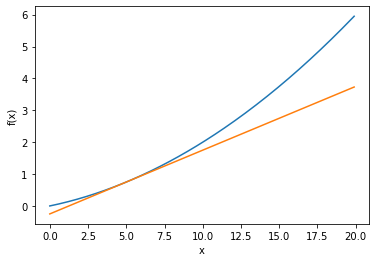

In [11]:
import numpy as np
import matplotlib.pylab as plt

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):  # y = 0.01*x^2 + 0.1*x
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

derivative_5 = numerical_diff(function_1, 5)# 在 (5, function_1(5)) 的导数
y_2 = [derivative_5 * (i - 5) + function_1(5) for i in x]
plt.plot(x, y_2)

plt.show()

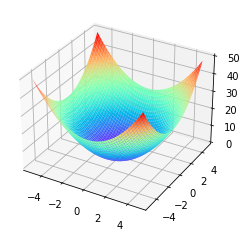

In [14]:
# 偏导数
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def function_2(x):  # f(x0, x1) = x0^2 + x1^2
    return x[0]**2 + x[1]**2

#定义图像和三维格式坐标轴
fig = plt.figure()
ax3 = plt.axes(projection='3d')

#定义三维数据
xx = np.arange(-5,5,0.1)
yy = np.arange(-5,5,0.1)
X, Y = np.meshgrid(xx, yy)
Z = function_2([X, Y])

#作图
ax3.plot_surface(X,Y,Z,cmap='rainbow')
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow)   #等高线图，要设置offset，为Z的最小值
plt.show()

# 求偏导数 高数

In [15]:
# 4.4 
# 梯度
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)# 生成和x形状相同的全0数组
    
    for idx in range(x.size):# 梯度 每个自变量的偏导数集合 求x0偏导数 将x1看做已知常量 求函数导数 
        tmp_val = x[idx]
        # f(x+h)  f(x-h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val# 还原x值
        
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))# 输出（6， 8）

# 梯度指示的方向是函数值减小最快的方向

[6. 8.]


In [29]:
# 梯度法
# 学习率

# 默认学习率为0.01 梯度法重复次数为100
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

# 尝试用梯度法求function_2的最小值
# 实际可知该函数最小值点为 (0, 0)

init_x = np.array([-3.0, 4.0])

# 可以看一下学习率 和 训练次数 的影响
#print(gradient_descent(function_2, init_x=init_x, lr=1, step_num=10))# [-3.  4.]
#print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))# [-6.11110793e-10  8.14814391e-10]
#print(gradient_descent(function_2, init_x=init_x, lr=0.01, step_num=100))# [-0.39785867  0.53047822]
#print(gradient_descent(function_2, init_x=init_x, lr=0.01, step_num=1000))# [-5.04890207e-09  6.73186943e-09]
#print(gradient_descent(function_2, init_x=init_x, lr=0.0001, step_num=10000))# [-1.88812247e-20  2.52844298e-20]

# print(gradient_descent(function_2, init_x=init_x, lr=10, step_num=100))# [ 1.19952874e+12 -2.58191483e+12]
print(gradient_descent(function_2, init_x=init_x, lr=0.0000000001, step_num=100))# [-2.99999994  3.99999992]

[-2.99999994  3.99999992]


In [7]:
# 神经网络的梯度
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)# 用高斯分布进行初始化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

net = simpleNet()
print(net.W)# 权重参数

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

t = np.array([0, 0, 1])# 正解标签
print(net.loss(x, t))

[[-0.51779043  1.19072068  0.02618904]
 [-1.67761803 -0.71644905  2.03080095]]
[-1.82053048  0.06962826  1.84343428]
2
0.17841098655766


In [8]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.01286556  0.08517538 -0.09804094]
 [ 0.01929833  0.12776307 -0.1470614 ]]


In [ ]:
# 4.5
# 学习算法的实现
# 手写体数字识别的神经网络

import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x:输入数据  t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)# np.argmax()详细解释 https://blog.csdn.net/weixin_42755982/article/details/104542538
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
#net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []

# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):# 一次循环跑了大概60秒 总共一万次 10;45 start  估计得跑一个星期
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    print(loss)
    train_loss_list.append(loss)

2.2901839052363413
2.2970039626037875
2.2915217451886734
2.2732237278034826
2.294427069652072
2.3048960093954385
2.2989980440805717
2.2861485349305775
2.3051354399411497
2.2940087591567884
2.2869088788080445
2.277383293292367
2.285823135867449
2.2958311441902066
2.272714801521791


In [ ]:
# 基于测试数据的评价
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x:输入数据  t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)# np.argmax()详细解释 https://blog.csdn.net/weixin_42755982/article/details/104542538
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
#net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_size = x_train.shape[0]
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):# 一次循环跑了大概  秒 总共一万次 11:30:00 start  估计得跑
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    #print(loss)
    train_loss_list.append(loss)
    
    # 计算每个epoch的识别精度
    if i % iter_per_epoch == 0: # 
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

In [ ]:
# 第五章
# 误差反向传播法

In [ ]:
# 5.1 计算图
# 正向传播 
# 反向传播
# 计算图的有点：简化问题、存储中间计算结果、最重要的 可以通过反向传播高效计算导数

In [ ]:
# 5.2 链式法则


In [ ]:
# 5.3 反向传播
# 加法节点的反向传播
# 乘法节点的反向传播

In [7]:
# 5.4 简单层的实现
# 乘法层
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    # 正向求结果
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    
    # 反向求导数
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy
    
# 例子
apple = 100# 苹果单价
apple_num = 2# 购买数量
tax = 1.1# 税率
# 最终支付的钱 = 100 * 2 * 1.1

# layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(int(price))        

220


In [8]:
# 加法层
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy   

In [10]:
# 例子 使用乘法层和加法层实现 购买2个苹果 3个橘子
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print('price = ' + str(price))
print(dapple_num, dapple, dorange_num, dorange, dtax)

price = 715.0000000000001
110.00000000000001 2.2 165.0 3.3000000000000003 650


In [1]:
# 5.5 激活函数层的实现
# ReLU层
# ReLU   x > 0: y = x  x <= 0: y = 0
class ReLU:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx
    
# 示例
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
example_relu = ReLU()
example_out = example_relu.forward(x)
example_dout = example_relu.backward(np.ones_like(x))
print(x)
print(example_out)
print(example_dout)

[[ 1.  -0.5]
 [-2.   3. ]]
[[1. 0.]
 [0. 3.]]
[[1. 0.]
 [0. 1.]]


In [1]:
# Sigmoid 层
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

In [2]:
# 5.6 Affine/Softmax层的实现
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.x.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

In [3]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def cross_entropy_error(y, t): # one-hot-label=True
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 损失
        self.y = None # softmax的输出
        self.t = None # 监督数据 one-hot vector
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_sizea# softmax反向传播得到的结果： (y1 - t1, y2 - t2, .. yn - tn)
        return dx

In [4]:
# 5.7 误差反向传播的实现
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        # 生成层
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        # 设定
        grads = {}
        # 这些值 在计算backward时已经写入类中
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads

In [5]:
from dataset.mnist import load_mnist

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
x_batch = x_train[:3]
t_batch = t_train[:3]
grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 求各个权重的绝对误差的平均值
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

W1:3.8447021876289604e-10
b1:2.2210669621514858e-09
W2:6.022951372544388e-09
b2:1.3965380227243251e-07


In [6]:
import matplotlib.pyplot as plt
# 使用误差反向传播法学习
#iters_num = 10000
iters_num = 100000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_pre_epoch = max(train_size / batch_size, 1)
x_ = []

for i in range(iters_num): # 16:57:20   比之前数值微分算梯度快了无数倍
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 通过误差反向传播法求梯度
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    #train_loss_list.append(loss)
    
    if i % iter_pre_epoch == 0:
        train_loss_list.append(loss)
        x_.append(i)
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.10965 0.1094
0.9036166666666666 0.9056
0.9178833333333334 0.9192
0.9329333333333333 0.931
0.9413166666666667 0.9395
0.9492166666666667 0.9471
0.9524166666666667 0.9501
0.95895 0.9546
0.96395 0.9577
0.96605 0.9595
0.9687 0.9625
0.9712166666666666 0.9642
0.9731 0.9659
0.9742166666666666 0.9663
0.9757 0.9679
0.9772333333333333 0.9677
0.9772166666666666 0.9688
0.9788666666666667 0.9681
0.9807 0.9707
0.9811666666666666 0.971
0.9809666666666667 0.9699
0.9826 0.97
0.9831666666666666 0.971
0.9835666666666667 0.9714
0.98435 0.9712
0.9851 0.9707
0.9852333333333333 0.9716
0.9870666666666666 0.9731
0.9860666666666666 0.9721
0.9883333333333333 0.9731
0.9884833333333334 0.9734
0.9885166666666667 0.9729
0.9887 0.9722
0.98945 0.9728
0.9898666666666667 0.9728
0.9901333333333333 0.974
0.9912166666666666 0.9736
0.9909 0.9726
0.9914333333333334 0.9736
0.9911 0.972
0.992 0.973
0.9921666666666666 0.9726
0.9931333333333333 0.9734
0.9930166666666667 0.9724
0.9935166666666667 0.9734
0.9913833333333333 0.972


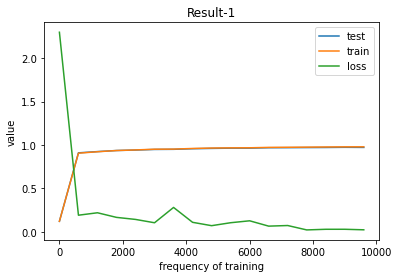

In [7]:
# 绘制图形
plt.plot(x_, test_acc_list, label='test')
plt.plot(x_, train_acc_list, label='train')
plt.plot(x_, train_loss_list, label='loss')
plt.title('Result-1')
plt.xlabel('frequency of training')
plt.ylabel('value')
plt.legend()
plt.show()

In [8]:
print(iter_pre_epoch)

600.0


In [1]:
# 第六章
# 6.1 参数的更新
# 最优化
# 随机梯度下降法 SGD
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

# 优化器 optimizer

# SGD的缺点：如果函数方向非均向 搜索路径就会十分低效
# 根本原因是：梯度的方向并没有指向最小值的方向

In [3]:
# Momentum
import numpy as np

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(vall)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [4]:
# AdaGrad
# 学习衰减率
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


In [5]:
# Adam
# 组合了Momentum和AdaGrad方法


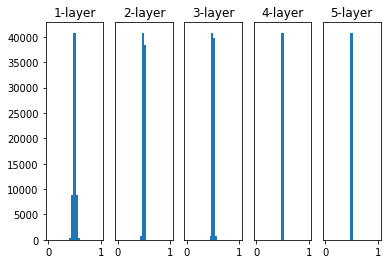

In [7]:
# 6.2 权重的初始值
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层的节点（神经元）数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 改变初始值进行实验！
    #w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 将激活函数的种类也改变，来进行实验！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 绘制直方图
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [8]:
# 不同激活函数初始值推荐
# sigmoid 前一层节点数为n 初始值使用标准差为 1/sqrt(n) 的分布
# ReLU 使用ReLU专用的初始值 当前一层节点数为n时 初始值使用标准差为sqrt(2/n)的高斯分布

============== 1/16 ==============
epoch:0 | 0.092 - 0.109


..\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
F:\Anconda\envs\OpenCVAndTf\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.118
epoch:2 | 0.097 - 0.111
epoch:3 | 0.097 - 0.127
epoch:4 | 0.097 - 0.138
epoch:5 | 0.097 - 0.172
epoch:6 | 0.097 - 0.189
epoch:7 | 0.097 - 0.21
epoch:8 | 0.097 - 0.225
epoch:9 | 0.097 - 0.241
epoch:10 | 0.097 - 0.255
epoch:11 | 0.097 - 0.272
epoch:12 | 0.097 - 0.288
epoch:13 | 0.097 - 0.307
epoch:14 | 0.097 - 0.318
epoch:15 | 0.097 - 0.33
epoch:16 | 0.097 - 0.345
epoch:17 | 0.097 - 0.359
epoch:18 | 0.097 - 0.361


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.385
============== 2/16 ==============
epoch:0 | 0.1 - 0.108


..\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.117
epoch:2 | 0.097 - 0.121
epoch:3 | 0.097 - 0.153
epoch:4 | 0.097 - 0.17
epoch:5 | 0.097 - 0.193
epoch:6 | 0.097 - 0.213
epoch:7 | 0.097 - 0.243
epoch:8 | 0.097 - 0.263
epoch:9 | 0.097 - 0.296
epoch:10 | 0.097 - 0.313
epoch:11 | 0.097 - 0.336
epoch:12 | 0.097 - 0.368
epoch:13 | 0.097 - 0.392
epoch:14 | 0.097 - 0.4
epoch:15 | 0.097 - 0.416
epoch:16 | 0.097 - 0.43
epoch:17 | 0.097 - 0.444
epoch:18 | 0.097 - 0.461


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.474
============== 3/16 ==============
epoch:0 | 0.115 - 0.119
epoch:1 | 0.285 - 0.121
epoch:2 | 0.453 - 0.161
epoch:3 | 0.54 - 0.195
epoch:4 | 0.597 - 0.248
epoch:5 | 0.666 - 0.279
epoch:6 | 0.702 - 0.308
epoch:7 | 0.741 - 0.352
epoch:8 | 0.773 - 0.385
epoch:9 | 0.811 - 0.412
epoch:10 | 0.832 - 0.446
epoch:11 | 0.853 - 0.471
epoch:12 | 0.878 - 0.492
epoch:13 | 0.898 - 0.519
epoch:14 | 0.905 - 0.539
epoch:15 | 0.92 - 0.565
epoch:16 | 0.929 - 0.588
epoch:17 | 0.94 - 0.604
epoch:18 | 0.946 - 0.617


No handles with labels found to put in legend.


epoch:19 | 0.949 - 0.634
============== 4/16 ==============
epoch:0 | 0.118 - 0.095
epoch:1 | 0.329 - 0.117
epoch:2 | 0.432 - 0.243
epoch:3 | 0.543 - 0.343
epoch:4 | 0.609 - 0.389
epoch:5 | 0.658 - 0.441
epoch:6 | 0.707 - 0.477
epoch:7 | 0.725 - 0.518
epoch:8 | 0.749 - 0.555
epoch:9 | 0.769 - 0.58
epoch:10 | 0.792 - 0.612
epoch:11 | 0.798 - 0.642
epoch:12 | 0.817 - 0.669
epoch:13 | 0.824 - 0.69
epoch:14 | 0.839 - 0.703
epoch:15 | 0.85 - 0.727
epoch:16 | 0.854 - 0.739
epoch:17 | 0.875 - 0.761
epoch:18 | 0.874 - 0.776


No handles with labels found to put in legend.


epoch:19 | 0.881 - 0.79
============== 5/16 ==============
epoch:0 | 0.115 - 0.135
epoch:1 | 0.117 - 0.154
epoch:2 | 0.112 - 0.298
epoch:3 | 0.115 - 0.412
epoch:4 | 0.122 - 0.509
epoch:5 | 0.128 - 0.558
epoch:6 | 0.134 - 0.594
epoch:7 | 0.142 - 0.641
epoch:8 | 0.157 - 0.679
epoch:9 | 0.173 - 0.706
epoch:10 | 0.191 - 0.73
epoch:11 | 0.215 - 0.751
epoch:12 | 0.225 - 0.769
epoch:13 | 0.225 - 0.78
epoch:14 | 0.251 - 0.788
epoch:15 | 0.267 - 0.811
epoch:16 | 0.276 - 0.823
epoch:17 | 0.291 - 0.829
epoch:18 | 0.31 - 0.837


No handles with labels found to put in legend.


epoch:19 | 0.334 - 0.849
============== 6/16 ==============
epoch:0 | 0.072 - 0.081
epoch:1 | 0.114 - 0.174
epoch:2 | 0.138 - 0.394
epoch:3 | 0.116 - 0.588
epoch:4 | 0.116 - 0.667
epoch:5 | 0.116 - 0.72
epoch:6 | 0.116 - 0.746
epoch:7 | 0.116 - 0.768
epoch:8 | 0.116 - 0.793
epoch:9 | 0.116 - 0.806
epoch:10 | 0.12 - 0.835
epoch:11 | 0.116 - 0.849
epoch:12 | 0.145 - 0.871
epoch:13 | 0.165 - 0.885
epoch:14 | 0.174 - 0.89
epoch:15 | 0.119 - 0.899
epoch:16 | 0.116 - 0.91
epoch:17 | 0.12 - 0.921
epoch:18 | 0.151 - 0.928


No handles with labels found to put in legend.


epoch:19 | 0.13 - 0.939
============== 7/16 ==============
epoch:0 | 0.104 - 0.083
epoch:1 | 0.117 - 0.195
epoch:2 | 0.117 - 0.592
epoch:3 | 0.117 - 0.705
epoch:4 | 0.117 - 0.763
epoch:5 | 0.117 - 0.793
epoch:6 | 0.117 - 0.834
epoch:7 | 0.117 - 0.868
epoch:8 | 0.117 - 0.899
epoch:9 | 0.117 - 0.913
epoch:10 | 0.117 - 0.931
epoch:11 | 0.117 - 0.938
epoch:12 | 0.117 - 0.948
epoch:13 | 0.117 - 0.955
epoch:14 | 0.117 - 0.961
epoch:15 | 0.117 - 0.971
epoch:16 | 0.117 - 0.974
epoch:17 | 0.117 - 0.977
epoch:18 | 0.117 - 0.981


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.983
============== 8/16 ==============
epoch:0 | 0.094 - 0.078
epoch:1 | 0.117 - 0.313
epoch:2 | 0.117 - 0.579
epoch:3 | 0.117 - 0.688
epoch:4 | 0.116 - 0.778
epoch:5 | 0.117 - 0.84
epoch:6 | 0.117 - 0.871
epoch:7 | 0.117 - 0.912
epoch:8 | 0.117 - 0.932
epoch:9 | 0.116 - 0.948
epoch:10 | 0.116 - 0.96
epoch:11 | 0.116 - 0.975
epoch:12 | 0.116 - 0.983
epoch:13 | 0.116 - 0.986
epoch:14 | 0.117 - 0.99
epoch:15 | 0.117 - 0.991
epoch:16 | 0.117 - 0.993
epoch:17 | 0.117 - 0.995
epoch:18 | 0.117 - 0.995


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.105 - 0.14
epoch:1 | 0.116 - 0.492
epoch:2 | 0.117 - 0.796
epoch:3 | 0.117 - 0.863
epoch:4 | 0.105 - 0.917
epoch:5 | 0.105 - 0.95
epoch:6 | 0.105 - 0.965
epoch:7 | 0.117 - 0.982
epoch:8 | 0.117 - 0.989
epoch:9 | 0.117 - 0.992
epoch:10 | 0.117 - 0.991
epoch:11 | 0.117 - 0.993
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.087 - 0.104
epoch:1 | 0.117 - 0.601
epoch:2 | 0.117 - 0.752
epoch:3 | 0.117 - 0.788
epoch:4 | 0.117 - 0.843
epoch:5 | 0.117 - 0.852
epoch:6 | 0.117 - 0.901
epoch:7 | 0.117 - 0.947
epoch:8 | 0.117 - 0.929
epoch:9 | 0.117 - 0.986
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.999
epoch:13 | 0.117 - 0.98
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 11/16 ==============
epoch:0 | 0.116 - 0.18
epoch:1 | 0.116 - 0.484
epoch:2 | 0.116 - 0.575
epoch:3 | 0.116 - 0.569
epoch:4 | 0.116 - 0.676
epoch:5 | 0.116 - 0.685
epoch:6 | 0.116 - 0.639
epoch:7 | 0.116 - 0.705
epoch:8 | 0.116 - 0.709
epoch:9 | 0.116 - 0.716
epoch:10 | 0.116 - 0.718
epoch:11 | 0.116 - 0.719
epoch:12 | 0.116 - 0.719
epoch:13 | 0.116 - 0.806
epoch:14 | 0.116 - 0.808
epoch:15 | 0.116 - 0.818
epoch:16 | 0.116 - 0.815
epoch:17 | 0.116 - 0.848
epoch:18 | 0.116 - 0.812


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.809
============== 12/16 ==============
epoch:0 | 0.087 - 0.184
epoch:1 | 0.116 - 0.543
epoch:2 | 0.116 - 0.704
epoch:3 | 0.116 - 0.628
epoch:4 | 0.116 - 0.667
epoch:5 | 0.116 - 0.685
epoch:6 | 0.116 - 0.764
epoch:7 | 0.116 - 0.786
epoch:8 | 0.116 - 0.791
epoch:9 | 0.116 - 0.796
epoch:10 | 0.116 - 0.812
epoch:11 | 0.116 - 0.825
epoch:12 | 0.116 - 0.85
epoch:13 | 0.116 - 0.877
epoch:14 | 0.116 - 0.857
epoch:15 | 0.116 - 0.803
epoch:16 | 0.116 - 0.894
epoch:17 | 0.116 - 0.99
epoch:18 | 0.116 - 0.987


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.99
============== 13/16 ==============
epoch:0 | 0.117 - 0.093
epoch:1 | 0.116 - 0.418
epoch:2 | 0.116 - 0.476
epoch:3 | 0.116 - 0.541
epoch:4 | 0.116 - 0.571
epoch:5 | 0.116 - 0.573
epoch:6 | 0.116 - 0.629
epoch:7 | 0.116 - 0.637
epoch:8 | 0.116 - 0.656
epoch:9 | 0.116 - 0.674
epoch:10 | 0.116 - 0.661
epoch:11 | 0.116 - 0.685
epoch:12 | 0.116 - 0.694
epoch:13 | 0.116 - 0.666
epoch:14 | 0.116 - 0.681
epoch:15 | 0.116 - 0.7
epoch:16 | 0.117 - 0.703
epoch:17 | 0.117 - 0.705
epoch:18 | 0.117 - 0.649


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.706
============== 14/16 ==============
epoch:0 | 0.087 - 0.1
epoch:1 | 0.105 - 0.33
epoch:2 | 0.117 - 0.477
epoch:3 | 0.117 - 0.518
epoch:4 | 0.117 - 0.554
epoch:5 | 0.117 - 0.581
epoch:6 | 0.117 - 0.585
epoch:7 | 0.117 - 0.585
epoch:8 | 0.117 - 0.604
epoch:9 | 0.117 - 0.604
epoch:10 | 0.117 - 0.59
epoch:11 | 0.117 - 0.595
epoch:12 | 0.117 - 0.582
epoch:13 | 0.117 - 0.612
epoch:14 | 0.117 - 0.607
epoch:15 | 0.117 - 0.608
epoch:16 | 0.117 - 0.615
epoch:17 | 0.117 - 0.616
epoch:18 | 0.117 - 0.685


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.615
============== 15/16 ==============
epoch:0 | 0.105 - 0.097
epoch:1 | 0.117 - 0.22
epoch:2 | 0.117 - 0.32
epoch:3 | 0.117 - 0.415
epoch:4 | 0.117 - 0.416
epoch:5 | 0.117 - 0.424
epoch:6 | 0.117 - 0.425
epoch:7 | 0.117 - 0.425
epoch:8 | 0.117 - 0.426
epoch:9 | 0.117 - 0.425
epoch:10 | 0.117 - 0.429
epoch:11 | 0.117 - 0.431
epoch:12 | 0.117 - 0.431
epoch:13 | 0.117 - 0.431
epoch:14 | 0.117 - 0.432
epoch:15 | 0.117 - 0.432
epoch:16 | 0.117 - 0.432
epoch:17 | 0.117 - 0.431
epoch:18 | 0.117 - 0.432


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.433
============== 16/16 ==============
epoch:0 | 0.117 - 0.239
epoch:1 | 0.117 - 0.117
epoch:2 | 0.117 - 0.305
epoch:3 | 0.117 - 0.308
epoch:4 | 0.117 - 0.313
epoch:5 | 0.117 - 0.315
epoch:6 | 0.117 - 0.311
epoch:7 | 0.117 - 0.366
epoch:8 | 0.117 - 0.406
epoch:9 | 0.117 - 0.427
epoch:10 | 0.117 - 0.487
epoch:11 | 0.117 - 0.501
epoch:12 | 0.117 - 0.479
epoch:13 | 0.117 - 0.507
epoch:14 | 0.117 - 0.508
epoch:15 | 0.117 - 0.508
epoch:16 | 0.117 - 0.507
epoch:17 | 0.117 - 0.516
epoch:18 | 0.117 - 0.519
epoch:19 | 0.117 - 0.516


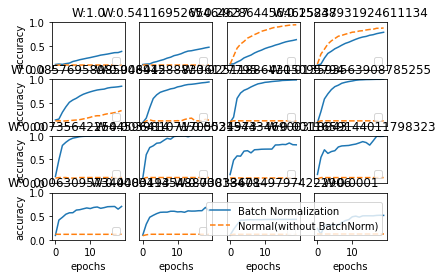

In [1]:
# 6.3 Batch Normalization
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 减少学习数据
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.绘制图形==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()


epoch:0, train acc:0.09, test acc:0.1103
epoch:1, train acc:0.12, test acc:0.1231
epoch:2, train acc:0.13666666666666666, test acc:0.1334
epoch:3, train acc:0.14333333333333334, test acc:0.1524
epoch:4, train acc:0.17, test acc:0.1716
epoch:5, train acc:0.19666666666666666, test acc:0.1841
epoch:6, train acc:0.21333333333333335, test acc:0.1953
epoch:7, train acc:0.25666666666666665, test acc:0.2125
epoch:8, train acc:0.28, test acc:0.2206
epoch:9, train acc:0.30666666666666664, test acc:0.2298
epoch:10, train acc:0.33666666666666667, test acc:0.242
epoch:11, train acc:0.3466666666666667, test acc:0.243
epoch:12, train acc:0.36666666666666664, test acc:0.2565
epoch:13, train acc:0.38666666666666666, test acc:0.2675
epoch:14, train acc:0.4, test acc:0.2792
epoch:15, train acc:0.4066666666666667, test acc:0.2896
epoch:16, train acc:0.41, test acc:0.3006
epoch:17, train acc:0.44333333333333336, test acc:0.3224
epoch:18, train acc:0.4766666666666667, test acc:0.3474
epoch:19, train acc:0.5

epoch:156, train acc:1.0, test acc:0.7412
epoch:157, train acc:0.9966666666666667, test acc:0.7433
epoch:158, train acc:1.0, test acc:0.7424
epoch:159, train acc:1.0, test acc:0.7419
epoch:160, train acc:1.0, test acc:0.7421
epoch:161, train acc:1.0, test acc:0.7414
epoch:162, train acc:1.0, test acc:0.7437
epoch:163, train acc:1.0, test acc:0.7418
epoch:164, train acc:1.0, test acc:0.7424
epoch:165, train acc:1.0, test acc:0.7419
epoch:166, train acc:1.0, test acc:0.7399
epoch:167, train acc:1.0, test acc:0.742
epoch:168, train acc:1.0, test acc:0.7414
epoch:169, train acc:1.0, test acc:0.7452
epoch:170, train acc:1.0, test acc:0.7442
epoch:171, train acc:1.0, test acc:0.7444
epoch:172, train acc:1.0, test acc:0.7412
epoch:173, train acc:1.0, test acc:0.7403
epoch:174, train acc:1.0, test acc:0.7428
epoch:175, train acc:1.0, test acc:0.7415
epoch:176, train acc:1.0, test acc:0.7418
epoch:177, train acc:1.0, test acc:0.7423
epoch:178, train acc:1.0, test acc:0.7431
epoch:179, train acc

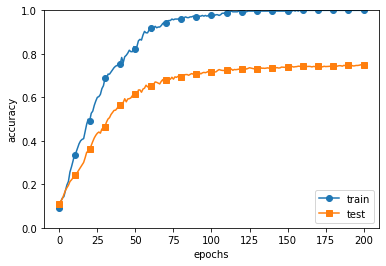

In [4]:
# 6.4 正则化
# 过拟合：
#     产生原因：模型拥有大量参数，表现力强    训练数据少
import os
import sys

sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（权值衰减）的设定 =======================
weight_decay_lambda = 0 # 不使用权值衰减的情况
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.09666666666666666, test acc:0.0998
epoch:1, train acc:0.13, test acc:0.112
epoch:2, train acc:0.13333333333333333, test acc:0.1213
epoch:3, train acc:0.14, test acc:0.1275
epoch:4, train acc:0.16, test acc:0.1284
epoch:5, train acc:0.17333333333333334, test acc:0.1315
epoch:6, train acc:0.18333333333333332, test acc:0.135
epoch:7, train acc:0.21666666666666667, test acc:0.1437
epoch:8, train acc:0.22333333333333333, test acc:0.1451
epoch:9, train acc:0.23333333333333334, test acc:0.1509
epoch:10, train acc:0.24666666666666667, test acc:0.1623
epoch:11, train acc:0.2733333333333333, test acc:0.1706
epoch:12, train acc:0.2833333333333333, test acc:0.1745
epoch:13, train acc:0.29, test acc:0.1838
epoch:14, train acc:0.32666666666666666, test acc:0.2039
epoch:15, train acc:0.33, test acc:0.2151
epoch:16, train acc:0.3333333333333333, test acc:0.2149
epoch:17, train acc:0.35, test acc:0.2148
epoch:18, train acc:0.36, test acc:0.2269
epoch:19, train acc:0.37, test acc:0.

epoch:161, train acc:0.8633333333333333, test acc:0.6893
epoch:162, train acc:0.8733333333333333, test acc:0.7117
epoch:163, train acc:0.8766666666666667, test acc:0.7083
epoch:164, train acc:0.88, test acc:0.7108
epoch:165, train acc:0.8866666666666667, test acc:0.7122
epoch:166, train acc:0.8866666666666667, test acc:0.7052
epoch:167, train acc:0.8766666666666667, test acc:0.6977
epoch:168, train acc:0.89, test acc:0.7191
epoch:169, train acc:0.8866666666666667, test acc:0.7217
epoch:170, train acc:0.8866666666666667, test acc:0.7202
epoch:171, train acc:0.89, test acc:0.7235
epoch:172, train acc:0.8866666666666667, test acc:0.7182
epoch:173, train acc:0.87, test acc:0.718
epoch:174, train acc:0.88, test acc:0.7198
epoch:175, train acc:0.8766666666666667, test acc:0.7165
epoch:176, train acc:0.8866666666666667, test acc:0.7151
epoch:177, train acc:0.8866666666666667, test acc:0.7229
epoch:178, train acc:0.89, test acc:0.7087
epoch:179, train acc:0.88, test acc:0.7152
epoch:180, train

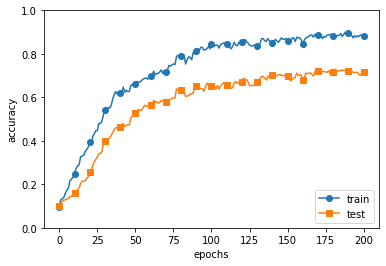

In [3]:
# 权值衰减
import os
import sys

sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（权值衰减）的设定 =======================
#weight_decay_lambda = 0 # 不使用权值衰减的情况
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Dropout
# 在学习的过程中随机删除神经元
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

train loss:2.293568872657596
=== epoch:1, train acc:0.09666666666666666, test acc:0.0848 ===
train loss:2.291787927186392
train loss:2.2993382750627993
train loss:2.2884613762616777
=== epoch:2, train acc:0.09333333333333334, test acc:0.0865 ===
train loss:2.3078543379268233
train loss:2.3014305200763863
train loss:2.2985121559700996
=== epoch:3, train acc:0.09666666666666666, test acc:0.0877 ===
train loss:2.2925706246147706
train loss:2.280815975327108
train loss:2.275756268392726
=== epoch:4, train acc:0.10666666666666667, test acc:0.0915 ===
train loss:2.2905396633099873
train loss:2.2949968039658923
train loss:2.294052934967044
=== epoch:5, train acc:0.11333333333333333, test acc:0.0929 ===
train loss:2.276345635784249
train loss:2.2867215753307844
train loss:2.2880128076239568
=== epoch:6, train acc:0.11333333333333333, test acc:0.0941 ===
train loss:2.27467077431825
train loss:2.291508171553738
train loss:2.288054050624547
=== epoch:7, train acc:0.11666666666666667, test acc:0.0

=== epoch:56, train acc:0.37666666666666665, test acc:0.2926 ===
train loss:2.222690839566905
train loss:2.2164309454036517
train loss:2.214246674588496
=== epoch:57, train acc:0.37666666666666665, test acc:0.2933 ===
train loss:2.2273656463312217
train loss:2.2095971635332234
train loss:2.2119097410448436
=== epoch:58, train acc:0.39, test acc:0.2935 ===
train loss:2.194175127690622
train loss:2.2346819248368193
train loss:2.2144829391091836
=== epoch:59, train acc:0.3933333333333333, test acc:0.2975 ===
train loss:2.22821358313087
train loss:2.2004244797866765
train loss:2.2480666597684342
=== epoch:60, train acc:0.3933333333333333, test acc:0.3005 ===
train loss:2.208195070530535
train loss:2.2221013908658707
train loss:2.216291104725049
=== epoch:61, train acc:0.4, test acc:0.3028 ===
train loss:2.193744561029593
train loss:2.1984627383986326
train loss:2.2105685073410823
=== epoch:62, train acc:0.39666666666666667, test acc:0.3061 ===
train loss:2.19350158209181
train loss:2.22974

=== epoch:112, train acc:0.4533333333333333, test acc:0.3517 ===
train loss:2.04949085010875
train loss:2.0785548599385972
train loss:2.0685941730764283
=== epoch:113, train acc:0.45, test acc:0.3543 ===
train loss:2.082848883662349
train loss:2.020495062748058
train loss:2.124952890649846
=== epoch:114, train acc:0.44666666666666666, test acc:0.355 ===
train loss:2.0592936987687915
train loss:2.0703626984249386
train loss:2.074924685614462
=== epoch:115, train acc:0.45, test acc:0.3549 ===
train loss:2.114055110550458
train loss:2.070845087538554
train loss:2.0509989112525644
=== epoch:116, train acc:0.4533333333333333, test acc:0.3604 ===
train loss:2.015205639017675
train loss:2.0135185204549724
train loss:2.0639064812254464
=== epoch:117, train acc:0.44666666666666666, test acc:0.3603 ===
train loss:2.06075562739736
train loss:2.0558876454912847
train loss:2.1340835687907864
=== epoch:118, train acc:0.4666666666666667, test acc:0.3645 ===
train loss:2.0184670198626247
train loss:2.

=== epoch:167, train acc:0.48333333333333334, test acc:0.3891 ===
train loss:1.8144984175677683
train loss:1.7432395376201586
train loss:1.7940848289594624
=== epoch:168, train acc:0.48333333333333334, test acc:0.3923 ===
train loss:1.7823091025563387
train loss:1.6282671710076175
train loss:1.7310865071887493
=== epoch:169, train acc:0.48, test acc:0.3922 ===
train loss:1.8304292023727238
train loss:1.7189573311220834
train loss:1.8191262198709284
=== epoch:170, train acc:0.4866666666666667, test acc:0.3984 ===
train loss:1.7028065773532866
train loss:1.7737469513579347
train loss:1.7702364112112354
=== epoch:171, train acc:0.4866666666666667, test acc:0.4009 ===
train loss:1.6980203477415028
train loss:1.7779210917821764
train loss:1.717705245040946
=== epoch:172, train acc:0.5, test acc:0.404 ===
train loss:1.7251502999168813
train loss:1.7657409353626035
train loss:1.8508944328282504
=== epoch:173, train acc:0.5033333333333333, test acc:0.4093 ===
train loss:1.715960156016732
train

=== epoch:222, train acc:0.6433333333333333, test acc:0.5277 ===
train loss:1.5380647020246472
train loss:1.400341950382235
train loss:1.533208436886318
=== epoch:223, train acc:0.6466666666666666, test acc:0.532 ===
train loss:1.4232547784008918
train loss:1.4748780553011336
train loss:1.4023221647896127
=== epoch:224, train acc:0.6433333333333333, test acc:0.533 ===
train loss:1.3799752553968907
train loss:1.4567300732359973
train loss:1.5772147188407268
=== epoch:225, train acc:0.6566666666666666, test acc:0.5387 ===
train loss:1.4331136141505276
train loss:1.4166557473189048
train loss:1.5039809616436977
=== epoch:226, train acc:0.6566666666666666, test acc:0.5423 ===
train loss:1.3030135810534227
train loss:1.4610436092047514
train loss:1.5789000077977144
=== epoch:227, train acc:0.6666666666666666, test acc:0.5392 ===
train loss:1.3922717277730774
train loss:1.4370323964299425
train loss:1.514079688694842
=== epoch:228, train acc:0.6666666666666666, test acc:0.5418 ===
train loss

=== epoch:278, train acc:0.7166666666666667, test acc:0.5861 ===
train loss:1.034892274876656
train loss:1.2012139688269714
train loss:1.1908553303623612
=== epoch:279, train acc:0.71, test acc:0.5836 ===
train loss:1.0705609358409642
train loss:1.1174578037041674
train loss:0.9916876578662871
=== epoch:280, train acc:0.7166666666666667, test acc:0.5821 ===
train loss:1.072309563183403
train loss:1.064894664376811
train loss:1.0749785633157998
=== epoch:281, train acc:0.7233333333333334, test acc:0.5821 ===
train loss:0.9821193453393667
train loss:1.0072907925804753
train loss:1.1827501297008627
=== epoch:282, train acc:0.7233333333333334, test acc:0.5832 ===
train loss:1.0717750592694089
train loss:1.1289747442065299
train loss:1.125163475777574
=== epoch:283, train acc:0.7166666666666667, test acc:0.581 ===
train loss:1.0501145471987794
train loss:1.0941091239737277
train loss:1.267317798043375
=== epoch:284, train acc:0.7233333333333334, test acc:0.583 ===
train loss:1.0292442174378

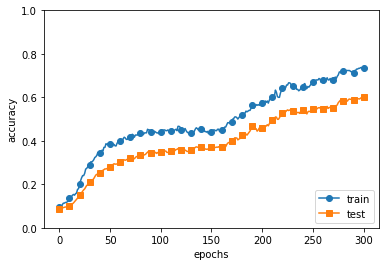

In [5]:
import os
import sys
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# 设定是否使用Dropuout，以及比例 ========================
use_dropout = True  # 不使用Dropout的情况下为False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [6]:
# 6.5 超参数验证
# 超参数对模型性能影响很大 
# 不能使用测试数据评估超参数的性能

# 训练数据 验证数据 测试数据

# 超参数的最优化


In [7]:
# 第七章 卷积神经网络 CNN
# 卷积层
# 池化层
# 全连接层

In [8]:
# 7.2 卷积层
# 全连接层存在的问题
# 全连接层忽视了数据的形状信息
# 卷积层可以以相同的形状输出数据
# 特征图：输入特征图 输出特征图

# 卷积运算
# 对应相乘再相加


In [1]:
# 填充
# 向输入数据周围填入固定的数据

# 步幅
# 

# 增大步幅 输出大小变小
# 增大填充 输出大小会变大


In [2]:
# 7.3 池化层
# 池化 缩小高、长方向上的空间运算

# 一般池化窗口的大小会和步幅设定为相同的值

# Max池化 Average池化

# 池化层的特征

In [3]:
# 7.4 卷积层和池化层的实现
# CNN中批处理
# im2col 函数 将输入的3(4)维数据展开成 2维大矩阵 
# 充分利用矩阵计算的库 高速进行大矩阵运算

In [18]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col
import numpy as np

class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2 * self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2 * self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1)# 滤波器展开
        out = np.dot(col, col_W) + self.b
        
        out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        #缺省值-1代表我不知道要给行（或者列）设置为几，reshape函数会根据原矩阵的形状自动调整。
        # transpose()  转置
        
        self.x = x
        self.col = col
        self.col_W = col_W
        
        return out
    
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

In [19]:
# 实验transpose
A = np.arange(16)
A = A.reshape(2, 2, 4)
B = A.copy()
#print(A)
B = B.transpose(1, 0, 2)
print(A)
print(B)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


In [20]:
# 池化层实现
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 展开
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h * self.pool_w)
        
        # 最大值
        out = np.max(col, axis=1)# 按行取最大值
        
        # 转换
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        self.x = x
        self.arg_max = arg_max
        
        return out
    
    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

In [22]:
# 7.5 CNN的实现
# 手写体数字识别的CNN网络结构
# Conv->ReLU->Pooling->Affine->ReLU->Affine->Softmax
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """简单的ConvNet

    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 输入大小（MNIST的情况下为784）
    hidden_size_list : 隐藏层的神经元数量的列表（e.g. [100, 100, 100]）
    output_size : 输出大小（MNIST的情况下为10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 指定权重的标准差（e.g. 0.01）
        指定'relu'或'he'的情况下设定“He的初始值”
        指定'sigmoid'或'xavier'的情况下设定“Xavier的初始值”
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 生成层
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """求损失函数
        参数x是输入数据、t是教师标签
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """求梯度（数值微分）

        Parameters
        ----------
        x : 输入数据
        t : 教师标签

        Returns
        -------
        具有各层的梯度的字典变量
            grads['W1']、grads['W2']、...是各层的权重
            grads['b1']、grads['b2']、...是各层的偏置
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """求梯度（误差反向传播法）

        Parameters
        ----------
        x : 输入数据
        t : 教师标签

        Returns
        -------
        具有各层的梯度的字典变量
            grads['W1']、grads['W2']、...是各层的权重
            grads['b1']、grads['b2']、...是各层的偏置
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 设定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

train loss:2.2996154112583955
=== epoch:1, train acc:0.174, test acc:0.172 ===
train loss:2.296484294477489
train loss:2.2940575215836954
train loss:2.287852870132015
train loss:2.276465596549983
train loss:2.2623185007432665
train loss:2.252986002897277
train loss:2.232129582945995
train loss:2.2223683359783304
train loss:2.2108491320715946
train loss:2.1761499285664208
train loss:2.1088151893267493
train loss:2.0517306847312047
train loss:1.9965128538297696
train loss:1.9997613052651024
train loss:1.934678590305138
train loss:1.7959173379785767
train loss:1.7521118977800463
train loss:1.6635297325049456
train loss:1.6740230726940744
train loss:1.5547034353647309
train loss:1.4939300136716545
train loss:1.490622045327292
train loss:1.382451184011468
train loss:1.2054067115522142
train loss:1.1704949343223603
train loss:1.1322309325628368
train loss:1.0801788304983122
train loss:0.9496420639500209
train loss:0.999866817631817
train loss:0.9987685114409117
train loss:0.8766914825256349


train loss:0.2140148003485378
train loss:0.2077284740336534
train loss:0.21536758192742525
train loss:0.3207758892439251
train loss:0.6599899425114559
train loss:0.2208321010002476
train loss:0.3035681411813301
train loss:0.33323857922262884
train loss:0.3963523415030011
train loss:0.3274747127796543
train loss:0.2447636108620042
train loss:0.1854062375116761
train loss:0.1814857393464445
train loss:0.10031232770626344
train loss:0.16715224403346213
train loss:0.2024824981913583
train loss:0.2797948665397395
train loss:0.2238660560711726
train loss:0.2292319104596026
train loss:0.2073091076133042
train loss:0.17218418958212836
train loss:0.2407823806699752
train loss:0.3154952449710362
train loss:0.17377138505142678
train loss:0.22794537087260397
train loss:0.17107205386978552
train loss:0.17580635836967906
train loss:0.27712330832121984
train loss:0.21058260258529685
train loss:0.19603107241748163
train loss:0.33450283602062236
train loss:0.206040830906436
train loss:0.292204813976740

train loss:0.18676937350749154
train loss:0.14789725855554145
train loss:0.2007112971550339
train loss:0.14631513710611965
train loss:0.1858590900903938
train loss:0.07728277404379247
train loss:0.18782066355222568
train loss:0.0883701795287996
train loss:0.09554285718440962
train loss:0.12826094808076097
train loss:0.13426479712576028
train loss:0.28082730964490876
train loss:0.12744765640130443
train loss:0.210892640599468
train loss:0.1465398071534598
train loss:0.22252368791406293
train loss:0.14605049349976648
train loss:0.23795155143563146
train loss:0.13507223207514524
train loss:0.23428326762987325
train loss:0.1386180180805877
train loss:0.15837519744290818
train loss:0.19638598811710575
train loss:0.13039111944457796
train loss:0.25985861837045143
train loss:0.1289108913703725
train loss:0.11306266053850397
train loss:0.21085735789432586
train loss:0.22512207297845244
train loss:0.09797745900764529
train loss:0.11422096045365208
train loss:0.18986170441681402
train loss:0.117

train loss:0.08191680307740176
train loss:0.11316735093140108
train loss:0.08842695910792113
train loss:0.0926062007300647
train loss:0.12371244583949481
train loss:0.1481109057069382
train loss:0.1342547487900317
train loss:0.05823717178361333
train loss:0.07641964636809098
train loss:0.06182390038995821
train loss:0.10162794014836272
train loss:0.19682436608156575
train loss:0.056059580616663614
train loss:0.03759587273110222
train loss:0.07320095683614922
train loss:0.025766103490471183
train loss:0.19212177288326193
train loss:0.1567569470577396
train loss:0.2058882200149299
train loss:0.048185507034904325
train loss:0.1574117563652336
train loss:0.14894403447538662
train loss:0.15805484626048621
train loss:0.07711097597542406
train loss:0.09489000318354643
train loss:0.16555771586688203
train loss:0.12042564225829705
train loss:0.0583734564830007
train loss:0.10212105526338908
train loss:0.13105595478491888
train loss:0.042749911713837456
train loss:0.17731100560458615
train loss:

train loss:0.035981696072467
train loss:0.06996206634282372
train loss:0.09613325968149149
train loss:0.04087488904190498
train loss:0.16425828603970627
train loss:0.14550258063523536
train loss:0.04401461649999918
train loss:0.08840809768500213
train loss:0.0926705520042521
train loss:0.1193309976286214
train loss:0.04591893043828245
train loss:0.05218343813047535
train loss:0.06211900490861272
train loss:0.026000369025635996
train loss:0.08476961491977067
train loss:0.08503497072835241
train loss:0.05708164794254786
train loss:0.06271057857905574
train loss:0.03854617013698467
train loss:0.03397578847748585
train loss:0.08689337071565709
train loss:0.04503419531069575
train loss:0.08383811400686421
train loss:0.10964409797972294
train loss:0.0751931204755586
train loss:0.057825982112089634
train loss:0.07457683248634558
train loss:0.041118165404752396
train loss:0.0520901997820647
train loss:0.04156457824804523
train loss:0.08692737054170709
train loss:0.0681569006867653
train loss:0

train loss:0.03665039698235207
train loss:0.030104344441617425
train loss:0.027905150484556086
train loss:0.15684446619898176
train loss:0.12965753726441598
train loss:0.12282582642466315
train loss:0.05001419239875922
train loss:0.062086340164527305
train loss:0.0333570229587914
train loss:0.039693802510326434
train loss:0.08126129133918937
train loss:0.042990609907294274
train loss:0.0363605502508588
train loss:0.046532307815893945
train loss:0.07379197807457301
train loss:0.02815590742073224
train loss:0.04418355195638613
train loss:0.0583686085089251
train loss:0.05048889003672491
train loss:0.09029979864381628
train loss:0.03789939156326303
train loss:0.12483965134452686
train loss:0.09574006690398278
train loss:0.08544437486367606
train loss:0.07288860710563456
train loss:0.07610436076527938
train loss:0.09287809540407162
train loss:0.05469294974595556
train loss:0.025533685214503003
train loss:0.11264221799619464
train loss:0.05948921108044032
train loss:0.03174614848849958
trai

train loss:0.06959907565923819
train loss:0.026148160314749213
train loss:0.020467264617377495
train loss:0.006620815327260534
train loss:0.04049074579429411
train loss:0.02127003908571299
train loss:0.0475173275743652
train loss:0.16600607805545964
train loss:0.022342258488338183
train loss:0.06005549897907131
train loss:0.08058890358443194
train loss:0.18342570455252016
train loss:0.04753034387241735
train loss:0.04881758245487637
train loss:0.06318366464596364
train loss:0.06265570796145649
train loss:0.020314293884442787
train loss:0.13798378047854473
train loss:0.1233900626063698
train loss:0.04884571456345447
train loss:0.00821221707430104
train loss:0.04594318159272898
train loss:0.03135111635831631
train loss:0.040263453441796646
train loss:0.058498385371771405
train loss:0.06779501510207832
train loss:0.05056249246570511
train loss:0.02979566828132043
train loss:0.03434589569998607
train loss:0.08616169545784075
train loss:0.03713968364728097
train loss:0.044952329210031644
tr

train loss:0.0208171388291432
train loss:0.032953472296596543
train loss:0.09135907685546706
train loss:0.00934027666775211
train loss:0.03148621052916875
train loss:0.015078565976090232
train loss:0.054377720196247224
train loss:0.02299616016078389
train loss:0.05109002477598489
train loss:0.014287724791199321
train loss:0.028673236855199916
train loss:0.0314699225787594
train loss:0.02905351081523422
train loss:0.03439348190199799
train loss:0.05427653419038918
train loss:0.018772239119155754
train loss:0.06248013181459726
train loss:0.005149379536514295
train loss:0.009954031006532986
train loss:0.06844669344544826
train loss:0.016618750913350397
train loss:0.01154708896774486
train loss:0.07555583264193161
train loss:0.014324106922139803
train loss:0.07487371593456217
train loss:0.09766588654526034
train loss:0.018307999358524844
train loss:0.021536694759518457
train loss:0.0412100433159139
train loss:0.0072531811296440395
train loss:0.020884971297148808
train loss:0.01706137050411

train loss:0.009533335909991425
train loss:0.09893606028833889
train loss:0.03741496624795681
train loss:0.040395172989143795
train loss:0.026478201662666567
train loss:0.015494769315197247
train loss:0.026767148914370105
train loss:0.03970863244670078
train loss:0.0070521151335153145
train loss:0.07294882102355076
train loss:0.062402717975725726
train loss:0.04171552058217104
train loss:0.0100107817259107
train loss:0.00868547055646774
train loss:0.0226665903483229
train loss:0.06544889397281242
train loss:0.03214523418348616
train loss:0.038002030085193435
train loss:0.018465404804803427
train loss:0.021353018707526945
train loss:0.06009143617372314
train loss:0.021493145932609627
train loss:0.04254775758230786
train loss:0.016609107428644222
train loss:0.04032994862590591
train loss:0.01967960098831186
train loss:0.05261016490618792
train loss:0.01511548187155426
train loss:0.007269364795056087
train loss:0.03603299721514243
train loss:0.07225612916149253
train loss:0.01944123771183

train loss:0.04213087788364597
train loss:0.04571652639924162
train loss:0.01903678052003905
train loss:0.01815706156592059
train loss:0.1316875837320773
train loss:0.010613260179244934
train loss:0.00837352071648604
train loss:0.020948747139315733
train loss:0.03869586880151555
train loss:0.05093933008582325
train loss:0.03567796362342891
train loss:0.04179610189925075
train loss:0.010549956357504492
train loss:0.02623254402189549
train loss:0.021569903233723143
train loss:0.005435923613484105
train loss:0.03578993370850775
train loss:0.061703220129876196
train loss:0.01585301615764183
train loss:0.02463459063675887
train loss:0.004390653524315618
train loss:0.00598060750338206
train loss:0.04582500523197327
train loss:0.00768854308797054
=== epoch:5, train acc:0.989, test acc:0.989 ===
train loss:0.022207249556191293
train loss:0.011574035933640495
train loss:0.010137469686600094
train loss:0.006643604608544321
train loss:0.006829035613523048
train loss:0.007052306241799078
train los

train loss:0.05015707068944227
train loss:0.011914721412982152
train loss:0.010949344382133918
train loss:0.009356851483828182
train loss:0.05305318823194129
train loss:0.0017137583914467636
train loss:0.025796062330175604
train loss:0.02261285876990338
train loss:0.009729473488106617
train loss:0.014302871253421317
train loss:0.040131849282606026
train loss:0.010654905650281946
train loss:0.02584197838201687
train loss:0.007854953859223815
train loss:0.004692067611965401
train loss:0.03967727176862187
train loss:0.048249367721939586
train loss:0.0192813922115683
train loss:0.037222282483108576
train loss:0.04102468577136805
train loss:0.10042827477177178
train loss:0.09992707779527525
train loss:0.009057994299553462
train loss:0.03671601075878894
train loss:0.008630969785837021
train loss:0.03006383304315742
train loss:0.04643431400684749
train loss:0.01749329014267464
train loss:0.011149742222295724
train loss:0.022892754448545896
train loss:0.06757339866773997
train loss:0.021530088

train loss:0.00843089170597091
train loss:0.00653066669491477
train loss:0.0149498922704444
train loss:0.010250062684653071
train loss:0.04199624309909245
train loss:0.050406497942600756
train loss:0.012416898827948308
train loss:0.01919291918596435
train loss:0.013582763781192029
train loss:0.011991726312005534
train loss:0.042556634992971035
train loss:0.01765998425130982
train loss:0.016078345178798886
train loss:0.15830365148096215
train loss:0.031232568145957044
train loss:0.011005862747055659
train loss:0.014386204817138381
train loss:0.01379380702508431
train loss:0.024902938761145296
train loss:0.05909553765811843
train loss:0.019160377197865987
train loss:0.003757471136953275
train loss:0.016777842200061364
train loss:0.01522109837256397
train loss:0.026392241418484695
train loss:0.0256853551097819
train loss:0.01781824514987324
train loss:0.007641384286217054
train loss:0.015549920021137737
train loss:0.03297910848847955
train loss:0.010510802614750028
train loss:0.0097160250

train loss:0.02258915827749321
train loss:0.014735853233190361
train loss:0.03878792049429916
train loss:0.0017725197428199685
train loss:0.00681895852926343
train loss:0.008603387800739616
train loss:0.02817274766864664
train loss:0.08774770929576697
train loss:0.010835405287978848
train loss:0.015974867787470835
train loss:0.07281870280225063
train loss:0.011553522342038127
train loss:0.019385973934344467
train loss:0.004991827960085652
train loss:0.020636561302050983
train loss:0.025148414539880787
train loss:0.007466740862442693
train loss:0.045060397824830414
train loss:0.02636575595610128
train loss:0.009192284033195889
train loss:0.005363789023313733
train loss:0.044358273525174734
train loss:0.011718211254798305
train loss:0.011704784125872043
train loss:0.014610581062981956
train loss:0.02031947776148644
train loss:0.011442598145526069
train loss:0.0077138968348841545
train loss:0.028475547296276025
train loss:0.030610240074765885
train loss:0.03788297005674326
train loss:0.00

train loss:0.01469990145800105
train loss:0.021332115619337646
train loss:0.0045794642589008176
train loss:0.044003133882282004
train loss:0.029162965095844068
train loss:0.020206160125809024
train loss:0.013675990052660302
train loss:0.008843652092099951
train loss:0.019927139525713303
train loss:0.025088923604359725
train loss:0.02226910419348815
train loss:0.019251592006175693
train loss:0.016001958099384653
train loss:0.01622677053453576
train loss:0.029101859254698853
train loss:0.06676549841579811
train loss:0.019542697134110363
train loss:0.002540647501324225
train loss:0.07415716470311164
train loss:0.005701131014786535
train loss:0.035539054115900345
train loss:0.007588037809641747
train loss:0.037056859168842195
train loss:0.020056405998004716
train loss:0.02053338559044422
train loss:0.005217397659360357
train loss:0.004601574375489412
train loss:0.009788435654705047
train loss:0.016234231137778995
train loss:0.0071426031176473215
train loss:0.027835652013761033
train loss:0

train loss:0.01562270352975002
train loss:0.012410505104964975
train loss:0.008333609621153103
train loss:0.017705983648721457
train loss:0.0193823230228908
train loss:0.010686046395213828
train loss:0.008678975449616811
train loss:0.0047774877693584385
train loss:0.0099418701918963
train loss:0.013929402873047645
train loss:0.017861883210078713
train loss:0.02179910965106425
train loss:0.01780085371990961
train loss:0.020213660291483738
train loss:0.004031585252098248
train loss:0.059221438396801634
train loss:0.022892098341803516
train loss:0.03536377326992382
train loss:0.011093523315090677
train loss:0.01727476888803549
train loss:0.00244018967186139
train loss:0.0052659279230317015
train loss:0.021496667322600173
train loss:0.01082923049754751
train loss:0.008132742123475797
train loss:0.010827986304412705
train loss:0.01808504874264204
train loss:0.033870353528812756
train loss:0.016471937139449114
train loss:0.0042468037465526074
train loss:0.027321751033820712
train loss:0.0149

train loss:0.017854891322071225
train loss:0.013680655146360209
train loss:0.15589061747095256
train loss:0.01244731977146266
train loss:0.02584945422354182
train loss:0.05654906773545834
train loss:0.02460435482211715
train loss:0.01533885700888039
train loss:0.0058837985238200455
train loss:0.03423644451268218
train loss:0.015199994448733085
train loss:0.012541013255870283
train loss:0.008434830844717743
train loss:0.00871619043912853
train loss:0.03245548446988885
train loss:0.019425426734682637
train loss:0.03697194139967215
train loss:0.0108435126061992
train loss:0.008869872264611858
train loss:0.012758087032995823
train loss:0.01779612561143951
train loss:0.008165326641307204
train loss:0.017821057417914562
train loss:0.030756221554820252
train loss:0.006068350306624412
train loss:0.02837655093231923
train loss:0.015925042854001863
train loss:0.027195379354740118
train loss:0.04976910586469725
train loss:0.010049648083573013
train loss:0.011408545544952969
train loss:0.016783665

train loss:0.01745763556425251
train loss:0.014023855556461698
train loss:0.006877938881128729
train loss:0.00761964819006114
train loss:0.007027196648622341
train loss:0.00813045177642389
train loss:0.0076555193384751094
train loss:0.010940707169605856
train loss:0.04832475025293335
train loss:0.047351203677695554
train loss:0.004136563159681719
=== epoch:8, train acc:0.991, test acc:0.989 ===
train loss:0.005187778826953839
train loss:0.010126463303207815
train loss:0.0019988607032402823
train loss:0.005753482783770045
train loss:0.0030133678042810258
train loss:0.017370454866194762
train loss:0.0035359632938378087
train loss:0.021794877945848466
train loss:0.010271605881809965
train loss:0.02209777429774594
train loss:0.01316378252748682
train loss:0.006168715825118
train loss:0.010784137004079784
train loss:0.0011033316812611865
train loss:0.006706172519563399
train loss:0.01325306942323554
train loss:0.006075217952996961
train loss:0.0217796277925819
train loss:0.00558480598613075

train loss:0.02758351274393235
train loss:0.007036581650406442
train loss:0.017613042436171972
train loss:0.01038041627950958
train loss:0.016885245148342776
train loss:0.02815213758994346
train loss:0.03274003475699457
train loss:0.0044183727818708175
train loss:0.022149475875100903
train loss:0.037924684820373034
train loss:0.0016305793758308192
train loss:0.007436221039717192
train loss:0.00689637014115479
train loss:0.004114100974770067
train loss:0.010264760449853439
train loss:0.007774345054857168
train loss:0.004251679531359289
train loss:0.0051519903705202295
train loss:0.00260416059244939
train loss:0.01595829452491658
train loss:0.03557599287427529
train loss:0.012093880946203554
train loss:0.019282352226221103
train loss:0.00841405989107047
train loss:0.007407224526427768
train loss:0.011842053595431007
train loss:0.003571734633535144
train loss:0.03565445109462336
train loss:0.00990595795735441
train loss:0.030283175171399376
train loss:0.030724782319087676
train loss:0.013

train loss:0.007473998929199033
train loss:0.0378810862520174
train loss:0.021934753063606923
train loss:0.01789671788744515
train loss:0.0030417258943300014
train loss:0.009384506547326619
train loss:0.0020882842750757713
train loss:0.016541646058754828
train loss:0.017905141572424916
train loss:0.0017066961404204062
train loss:0.007574164493049587
train loss:0.0019517842403215812
train loss:0.014039126345719952
train loss:0.0506202899118587
train loss:0.037105565054455704
train loss:0.0008717770183879519
train loss:0.024223510150911964
train loss:0.02121929791348639
train loss:0.008403680253502325
train loss:0.002696669225466256
train loss:0.016344311453335113
train loss:0.0281040585724449
train loss:0.024159913750406624
train loss:0.023107570204066813
train loss:0.005074499018121608
train loss:0.009450428833497731
train loss:0.005876940755685991
train loss:0.009165736317657087
train loss:0.015413525066079146
train loss:0.008028193268368412
train loss:0.005472063461287986
train loss:

train loss:0.02276914678207846
train loss:0.004888490535007154
train loss:0.011480478682424172
train loss:0.00124938698577734
train loss:0.001379247284145465
train loss:0.006341329852169016
train loss:0.015052295466664693
train loss:0.03838207201929551
train loss:0.009624753447259776
train loss:0.0028123629635234066
train loss:0.04607701191888578
train loss:0.011663032660753647
train loss:0.0023105564125143795
train loss:0.012019272094323857
train loss:0.011045175966143697
train loss:0.018404457758102077
train loss:0.01376470941546733
train loss:0.025006367556458957
train loss:0.007018239477990082
train loss:0.015370068790618686
train loss:0.006693999977610323
train loss:0.0033747130382549657
train loss:0.006841931862624885
train loss:0.027610263194925787
train loss:0.007866105669516503
train loss:0.026317536430462102
train loss:0.002220715265468192
train loss:0.00818390264870923
train loss:0.005828565210071122
train loss:0.006499692738254595
train loss:0.02222481752553903
train loss:0

train loss:0.004335658771494647
train loss:0.012025390403965512
train loss:0.009634554376359078
train loss:0.010585552897731632
train loss:0.0012959813253260151
train loss:0.01640941037226634
train loss:0.00499389793345406
train loss:0.017047290640658123
train loss:0.0022560898449755936
train loss:0.000989313784644526
train loss:0.006269374837065184
train loss:0.010929336955785714
train loss:0.025873155021290967
train loss:0.004638799682866509
train loss:0.0023890560529239704
train loss:0.019324948147055317
train loss:0.06763385334475236
train loss:0.0025504367566304208
train loss:0.00565004209916785
train loss:0.011973470910593835
train loss:0.0031003698951905805
train loss:0.004736775373825845
train loss:0.011864148667264221
train loss:0.025956806601808328
train loss:0.011452933226289146
train loss:0.003984105872449984
train loss:0.00309235200914955
train loss:0.006817693266887637
train loss:0.0020268059589735156
train loss:0.0011815474129888025
train loss:0.0016669120766036316
train

train loss:0.024763159691821576
train loss:0.0049577387695535526
train loss:0.003341617611756856
train loss:0.0736524594820557
train loss:0.006586527562901416
train loss:0.004811151601636716
train loss:0.03462223268464708
train loss:0.029969296676167656
train loss:0.006947031378946909
train loss:0.0015360239854317085
train loss:0.001293358578918256
train loss:0.003388744142136675
train loss:0.0015149623909488973
train loss:0.007991140001264163
train loss:0.02474523659065576
train loss:0.014468361083801905
train loss:0.039768280684530526
train loss:0.00864843876886232
train loss:0.004826261167586442
train loss:0.0070622607876085495
train loss:0.0070695788806957385
train loss:0.011632286103723334
train loss:0.00596425846208565
train loss:0.0034445372860244395
train loss:0.01577896895785838
train loss:0.0033816657631947195
train loss:0.0049254753953654334
train loss:0.007339686796382475
train loss:0.005270033207933412
train loss:0.023334048190238432
train loss:0.0021963981526891643
train 

train loss:0.0012942077092509263
train loss:0.008160984003857893
train loss:0.003932986708793701
train loss:0.005948769722905046
train loss:0.009445930353966195
train loss:0.004778531924163183
train loss:0.004429550920619615
train loss:0.00919794880980075
train loss:0.0031388298526680227
train loss:0.005461156767349501
train loss:0.01452657702519924
train loss:0.03513466641588379
train loss:0.04433524757079227
train loss:0.023024462519551814
train loss:0.007140181198952738
train loss:0.016322114046728824
train loss:0.00452486495779119
train loss:0.007797372316997878
train loss:0.00614914952928495
train loss:0.019981578771080293
train loss:0.011339092467497803
train loss:0.002525946356562963
train loss:0.004563552415659197
train loss:0.006193187158188711
train loss:0.0010551293992535039
train loss:0.006977927935492913
train loss:0.005743476180034401
train loss:0.015410095124332052
train loss:0.004224676751972
train loss:0.002641166689303887
train loss:0.0023239310919183328
train loss:0.

train loss:0.009998291954913169
train loss:0.008606713350167218
train loss:0.007720888739982109
train loss:0.0037900146356257664
train loss:0.007243612393092197
train loss:0.0014118270709964549
train loss:0.0011502880503085162
train loss:0.002518589424202794
train loss:0.0025073970877200124
train loss:0.0022287307455400303
train loss:0.007468009062916179
train loss:0.020649538505946852
train loss:0.0825480975248877
train loss:0.007991834321042753
train loss:0.013456955343004786
train loss:0.0007085655651287881
train loss:0.001799867474292464
train loss:0.009551158523878236
train loss:0.0047584786678726695
train loss:0.023826127829394778
=== epoch:11, train acc:0.994, test acc:0.989 ===
train loss:0.002035159706577147
train loss:0.009995786444428695
train loss:0.003609834984071446
train loss:0.0017790251476316225
train loss:0.018022549164679026
train loss:0.0011262949940054217
train loss:0.0009069203443570023
train loss:0.00948226339238609
train loss:0.006147581039004857
train loss:0.00

train loss:0.0004294647235211582
train loss:0.0011788732225402236
train loss:0.0006141883850786052
train loss:0.004743152677868554
train loss:0.014597238283943043
train loss:0.008219930422120948
train loss:0.002069887212807136
train loss:0.005993217430803697
train loss:0.004872173098093292
train loss:0.0013424304186210663
train loss:0.003083322895317102
train loss:0.003558446172264926
train loss:0.01258929834580037
train loss:0.0018120721580805524
train loss:0.003460969324805385
train loss:0.0008363767243916651
train loss:0.01922306733994176
train loss:0.009517379935898792
train loss:0.00431304024146131
train loss:0.0013676549341047229
train loss:0.0015074197495109519
train loss:0.007850625702016872
train loss:0.01060550498941351
train loss:0.0006023999414695337
train loss:0.0026634061048577246
train loss:0.0015446085688728955
train loss:0.006459770428763175
train loss:0.00030152746714299036
train loss:0.012541613760985075
train loss:0.0018626099094324862
train loss:0.00318117689123176

train loss:0.02217467136759087
train loss:0.05280240381317263
train loss:0.029275356513687057
train loss:0.003500679530031361
train loss:0.02340034448797192
train loss:0.0025907577489040112
train loss:0.0017030996111199884
train loss:0.006049592921089305
train loss:0.008290163755800444
train loss:0.014721780632211454
train loss:0.001701860607378614
train loss:0.007355253117533666
train loss:0.010376417734419488
train loss:0.0033748392691546596
train loss:0.029477090562273302
train loss:0.0033816833442384515
train loss:0.000991938944777188
train loss:0.01073963138300729
train loss:0.0010436914131985628
train loss:0.006675791851949825
train loss:0.007473604094502893
train loss:0.0020957685841776082
train loss:0.0678922066435816
train loss:0.009772065898841949
train loss:0.0005069597726191755
train loss:0.0005155898331215429
train loss:0.0030308014259051064
train loss:0.0071090601744174566
train loss:0.02250053218012661
train loss:0.004916740338573156
train loss:0.004239078574752589
train

train loss:0.00573271744460142
train loss:0.0007645595278098663
train loss:0.007047666433390779
train loss:0.007719292094899418
train loss:0.008249517134370688
train loss:0.00016253717535765811
train loss:0.0024943223116750787
train loss:0.006540032270389141
train loss:0.0004609453278736781
train loss:0.0002130111659008059
train loss:0.0009125937664232271
train loss:0.0027402498577859965
train loss:0.002492770286892044
train loss:0.005824986112640245
train loss:0.0004281407210499739
train loss:0.0015440965691356217
train loss:0.0019849355063568407
train loss:0.009555265989369673
train loss:0.000712929525568425
train loss:0.009827075853116311
train loss:0.0003722216555297436
train loss:0.002835558713724789
train loss:0.001945785182850871
train loss:0.005811196954441648
train loss:0.0028541184979962602
train loss:0.003142692643543254
train loss:0.06511761367232322
train loss:0.0009109814530688366
train loss:0.0012507438633614614
train loss:0.002628285826923328
train loss:0.00170994459669

train loss:0.0015133614739997383
train loss:0.0027734784235369397
train loss:0.007489742349732281
train loss:0.005509451932987701
train loss:0.0024314970300739823
train loss:0.0029906129033955824
train loss:0.00760483350694934
train loss:0.0018706343770242364
train loss:0.007699772949847295
train loss:0.006582676600174792
train loss:0.002355542931679514
train loss:0.006055221458164954
train loss:0.00434518879920134
train loss:0.0028070082391771626
train loss:0.028262120432353037
train loss:0.001627317661978909
train loss:0.0017409562596662515
train loss:0.006243407185526652
train loss:0.003124315226267166
train loss:0.0021625702622930423
train loss:0.0076143459381099975
train loss:0.005286172738262006
train loss:0.006427750916056434
train loss:0.004367503593210935
train loss:0.005749329645751216
train loss:0.001756069278591549
train loss:0.0020545936568135753
train loss:0.00603826649284227
train loss:0.002525704556738489
train loss:0.0013951652287518765
train loss:0.0013790480047221002

train loss:0.031567366445999404
train loss:0.00215251353783909
train loss:0.005071796016723343
train loss:0.01603177550700372
train loss:0.0020822062022235388
train loss:0.0006296452542701775
train loss:0.005770564708415666
train loss:0.001360098007495288
train loss:0.006130068498112436
train loss:0.014960009446006511
train loss:0.0005768912035027334
train loss:0.0018796831742830867
train loss:0.0010723116864904943
train loss:0.008115484109004381
train loss:0.0034557957355538967
train loss:0.0012939366800704458
train loss:0.0008381955815634504
train loss:0.003284380874159679
train loss:0.009319424047209894
train loss:0.00408041033472546
train loss:0.0007024993854823563
train loss:0.004550417976405151
train loss:0.004590760320073227
train loss:0.0025371234074363087
train loss:0.002313268582565962
train loss:0.0011150378847479782
train loss:0.006385154868098903
train loss:0.013290073505911097
train loss:0.0017365313753120348
train loss:0.005270799059791395
train loss:0.002718030028980669

train loss:0.001197584961774611
train loss:0.004109033629830326
train loss:0.0028103666369177945
train loss:0.004697903692011281
train loss:0.0009241952712851993
train loss:0.02006712883233264
train loss:0.0011543756383487085
train loss:0.06645673266348079
train loss:0.0008293402010580975
train loss:0.0005684085360860107
train loss:0.0027448832283720635
train loss:0.002395432848988823
train loss:0.045467159586093535
train loss:0.0012907092002648682
train loss:0.0016431240792335608
train loss:0.0008705416676397367
train loss:0.000658944958508659
train loss:0.001861045435442047
train loss:0.0017959634771990921
train loss:0.00032715749681516454
train loss:0.00134191481902718
train loss:0.002343300192973465
train loss:0.016140026544598732
train loss:0.04058452222399822
train loss:0.0005562624283748222
train loss:0.004668160259285311
train loss:0.0013703054605946929
train loss:0.027294761209251103
train loss:0.007300077554385966
train loss:0.0008509835698086159
train loss:0.0031986230618934

train loss:0.005235513730904595
train loss:0.005575218209774501
train loss:0.007370108180662971
train loss:0.00037445034665387745
train loss:0.0030350230198571996
train loss:0.002332807677375807
train loss:0.00038462836094612334
train loss:0.006581296007257815
train loss:0.0005528576098273447
train loss:0.0017154166657426667
train loss:0.0006911683033560454
train loss:0.0009152209973910932
train loss:0.0009142289806479624
train loss:0.0016120925989672264
train loss:0.0020721365105855942
train loss:0.017864663555528636
train loss:0.008481409472253587
train loss:0.0062866359167178
train loss:0.0050362832669622985
train loss:0.006055311966142963
train loss:0.004641494429092185
train loss:0.0008767025208626577
train loss:0.0005578974106377398
train loss:0.002845143812402592
train loss:0.0010750128918772858
train loss:0.0034218090076719447
train loss:0.005646014708298185
train loss:0.0017309863276375086
train loss:0.0020618706036391473
train loss:0.0018573216936851958
train loss:0.010896871

train loss:0.0005908948008677735
train loss:0.0031078125964126013
train loss:0.0013632128709045988
train loss:0.00190726678580841
train loss:0.0002960138101740747
train loss:0.001953863701567464
train loss:0.0013482773847652415
train loss:0.0026460389534103796
train loss:0.0014079883937656145
train loss:0.00047062148674477844
train loss:0.007493197491508126
train loss:0.001612141685402098
train loss:0.01629252449905951
train loss:0.016827897838845928
train loss:0.0005529119011962979
train loss:0.0005841735904192871
train loss:0.0003461347489642494
train loss:0.0006066118118915962
train loss:0.023562973784434758
train loss:0.004249546242455832
train loss:0.0006094933077490891
train loss:0.009283278551376247
train loss:0.011018510632671112
train loss:0.0017616363677848148
train loss:0.0019765265456944776
train loss:0.004296510559758377
train loss:0.037812456351126816
train loss:0.004357577870391435
train loss:0.005201506675202513
train loss:0.0032976784773665114
train loss:0.005030477468

train loss:0.00020244584649378814
train loss:0.003761217813662428
train loss:0.0007587951078279519
train loss:0.0035655367975827735
train loss:0.0012445380527679537
train loss:0.002467835876040451
train loss:0.028640290864179775
train loss:0.0005339507039960594
train loss:0.0008225738388826373
train loss:0.0015528525843662411
train loss:0.0006560742869993476
train loss:0.002353205579219099
train loss:0.004193718915773215
train loss:0.0036279048980310076
train loss:0.000987925834558959
train loss:0.0011353396277531324
train loss:0.0021966947658953206
train loss:0.003609332898281169
train loss:0.002365943015055102
train loss:0.01581196265779989
train loss:0.0016439023446933447
train loss:0.0005495607664285753
train loss:0.010977118098198305
train loss:0.0005303807015905804
train loss:0.005266527647132562
train loss:0.001970330595300184
train loss:0.0051845618158398886
train loss:0.002399819605807638
train loss:0.002131963690676628
train loss:0.0017146521551942356
train loss:0.00013503611

train loss:0.00029128739791072286
train loss:0.019794483498307675
train loss:0.0018237328106446465
train loss:0.0007224852963379301
train loss:0.002418685456951494
train loss:0.0005298178683812779
train loss:0.0012044556873812024
train loss:0.0031855071609728767
train loss:0.003094154883275273
train loss:0.002396339507617442
train loss:0.0002748087686306187
train loss:0.0006577561896736482
train loss:0.001134583724918554
train loss:0.0007005344189413075
train loss:0.0024692447313760402
train loss:0.01952655656976419
train loss:0.001662937072236853
train loss:0.003371417358051518
train loss:0.003247214651739821
train loss:0.0018641054377229026
train loss:0.004277085945829787
train loss:0.045547874533305714
train loss:0.0028854153005787187
train loss:0.003438172112551662
train loss:0.0003765405693749391
train loss:0.00015572068156359482
train loss:0.0033591366511798704
train loss:0.0027881131967786993
train loss:0.0018364045606441687
train loss:0.00047102345306141715
train loss:0.0003236

train loss:0.0012245525554848663
train loss:0.005598705194763054
train loss:0.004395488074953315
train loss:0.0008074551695342338
train loss:0.0004680305145787839
train loss:0.0008659073226659904
train loss:0.0015969908553878434
train loss:0.0011577351069220867
train loss:0.0019070060183580578
train loss:0.00026195833816363323
train loss:0.0017383122963590114
train loss:0.0002916078328111903
train loss:0.0022924831019942135
train loss:0.0008124197580413144
train loss:0.0024771439474771525
train loss:0.0008362714900142674
train loss:1.954307270655159e-05
train loss:0.002406277149891474
train loss:0.003831266568462247
train loss:0.0006395403374587762
train loss:0.0005428941696061357
train loss:0.01111246761673184
train loss:0.005019886823446651
train loss:0.00024095149517585447
train loss:0.02331252013876307
train loss:0.0002044033791699059
train loss:0.006887938948822193
train loss:0.00019210241275533985
train loss:0.002162471497996623
train loss:0.0006817863769512406
train loss:0.00595

train loss:5.204805348120246e-05
train loss:0.0024195430334912013
train loss:0.0011100849990535115
train loss:0.0028800252010417714
train loss:0.003568886179150946
train loss:0.0022740805216234805
train loss:0.0004578707979837705
train loss:0.0007178397304699567
train loss:0.0005901531414163441
train loss:0.0007927660280174699
train loss:0.010460053287925599
train loss:0.0014783854928958472
train loss:0.002315648034751376
train loss:0.019144610354238388
train loss:0.0018157161916979676
train loss:0.008308871744722019
train loss:0.0017703187913798895
train loss:0.0009732484304464671
train loss:0.00019618643793729328
train loss:0.0007660753195246712
train loss:0.0018083463084626395
train loss:0.009344182683777562
train loss:0.0005157542868973308
train loss:0.021830167197639704
train loss:0.0004051715256028798
train loss:0.0026998982926946073
train loss:0.0036757611449781953
train loss:0.00606846895575465
train loss:0.0006114766203967752
train loss:0.000244418435255278
train loss:0.001931

train loss:0.0009731534865819494
train loss:0.0030245814358023926
train loss:0.0014781635838685017
train loss:0.0002504433561310286
train loss:0.0013597145579410425
train loss:0.006902752115193645
train loss:0.000744201521292633
train loss:0.01405296994753597
train loss:0.0037250269658712924
train loss:0.0004376012518441856
train loss:0.002920262378393346
train loss:0.00018788006581399151
train loss:0.0014896754751578315
train loss:0.00398254342034142
train loss:0.0010542320877762648
train loss:0.00024068959712079594
train loss:0.005390758257833001
train loss:0.0028601281411998252
train loss:0.0008435911171675105
train loss:0.0017387725122116103
train loss:0.0005270656475496722
train loss:0.00026681309976670723
train loss:0.0011862284283556128
train loss:0.0016060895588426987
train loss:0.00015930889417690937
train loss:0.009437057996980995
train loss:0.0015921453604648326
train loss:0.0018242854868733879
train loss:0.00027875295898420726
train loss:0.0008156368920091414
train loss:0.0

train loss:0.00020908901389676723
train loss:0.0005472159912608139
train loss:0.00011758737440917812
train loss:0.004700833611343005
train loss:0.0006241871978870832
train loss:0.0028045019340108505
train loss:0.00022740368854568799
train loss:0.00021061647632964712
train loss:0.00198182186478527
train loss:0.0018631659084706804
train loss:5.104243391121019e-05
train loss:0.002133109648088358
train loss:0.00038233493558666897
train loss:0.0015860282648089152
train loss:0.0017995230333910067
train loss:0.0011129492047506741
train loss:0.00190957847281635
train loss:0.00041806205567598603
train loss:0.0005771797657431652
train loss:0.00026811164164860694
train loss:0.0013052048070712507
train loss:0.0025014839616017874
train loss:0.00026420524256850396
train loss:0.0015141184956867775
train loss:0.0005318818652626788
train loss:0.005203083611545133
train loss:0.0035343207720804444
train loss:0.015514704461806073
train loss:0.00325313071391677
train loss:0.0005813332533873432
train loss:0

train loss:0.0015550029193675083
train loss:0.038498042604064316
train loss:0.002462603813321431
train loss:0.00016474195438460023
train loss:0.0003643145250123548
train loss:0.0014809082846351657
train loss:0.003045064484115222
train loss:0.0013406312892199881
train loss:0.0006228423806448708
train loss:0.0007446581772835914
train loss:0.005124182841178726
train loss:0.005124168851969876
train loss:0.0007532686738867746
train loss:0.000726493187462767
train loss:0.006258631689939877
train loss:3.2971332213162084e-05
train loss:0.004620534990727804
train loss:0.0010773297071776883
train loss:0.0001739318725137255
train loss:0.0020404563866759378
train loss:0.004291094412478689
train loss:4.345176698464752e-05
train loss:0.0010058632422908084
train loss:0.0034132384732176073
train loss:0.00021096533553880656
train loss:0.012104540475327753
train loss:0.002910998471011617
train loss:0.001454781056579394
train loss:0.00027535362162415503
train loss:0.0015273248829938614
train loss:0.00470

train loss:0.0003978876640688858
train loss:8.862684830079846e-05
train loss:0.0013767928212465557
train loss:0.0020038132201988987
train loss:0.0013436252531406282
train loss:0.00043382589651475516
train loss:0.0011138754399372607
train loss:0.01498137250979305
train loss:0.001862010717249862
train loss:0.014900818928479833
train loss:0.005779756969709247
train loss:0.002093883272964522
train loss:0.0011407437355233456
train loss:0.0011686628619791855
train loss:0.007559125282439019
train loss:0.015504272518092886
train loss:0.00012600819443697473
train loss:0.004154387974983041
train loss:0.002242004252785893
train loss:0.0007995211689128443
train loss:0.0017844755171618034
train loss:5.665140254180738e-05
train loss:0.008773308627224584
train loss:0.0002074680614639829
train loss:0.0002994352725821169
train loss:0.00023829835907038184
train loss:0.005661544752025852
train loss:0.0013683098449791663
train loss:0.010846620001116948
train loss:0.008977835303226888
train loss:0.00104161

train loss:0.0031339912229893085
train loss:0.002755464380739461
train loss:0.005506668899663141
train loss:0.0003877918636906085
train loss:0.007967805681630804
train loss:0.002147075192765242
train loss:0.001371017223310624
train loss:0.0013190989964991916
train loss:7.143003815394846e-05
train loss:0.0015870676345928977
train loss:0.0010228646472321896
train loss:0.0030305432448965385
train loss:0.00033794823851755263
train loss:0.009356439768191066
train loss:0.0002981320854774782
train loss:0.012447396207567452
train loss:0.001959858138618057
train loss:0.0009279087414990876
train loss:0.0009238347239255752
train loss:0.0004218644111393188
train loss:0.0016542854128092643
train loss:0.0038659817495446647
train loss:0.0003894771214009152
train loss:0.002645874230813046
train loss:0.005999738536899536
train loss:0.0013283531074693693
train loss:0.00045969962497630345
train loss:0.0006126440898545839
train loss:0.002257708844214364
train loss:0.0012408066376056912
train loss:0.000476

train loss:0.0004761053450691962
train loss:0.008361804393150884
train loss:0.00035705191080174706
train loss:0.00028721404092677634
train loss:0.0022067836005321925
train loss:0.003855077166000928
train loss:0.0015567844254004701
train loss:0.0008608728125448947
train loss:0.0028919087992705815
train loss:0.0007433304120057631
train loss:0.0003472663236625545
train loss:0.003340575318288947
train loss:0.0009373894791653311
train loss:0.0011834311065627115
train loss:0.0018520623719115972
train loss:0.001003744103711725
train loss:0.0008904980921074996
train loss:0.004055113942965232
train loss:0.0007078569629104618
train loss:7.404978002128248e-05
train loss:0.0021405282926551684
train loss:0.0008931315207013513
train loss:0.018012568264878924
train loss:0.004420395485935148
train loss:0.0005740955148296452
train loss:0.0002193216787672417
train loss:2.5979488336881454e-05
train loss:0.001363195410986447
train loss:0.005679912843886051
train loss:0.0006742890387952979
train loss:0.000

train loss:0.0021950653380512623
train loss:3.689496865043787e-05
train loss:0.0002696305421955667
train loss:0.0007343779282469285
train loss:0.0007092518505194212
train loss:0.0009979472031766078
train loss:0.002417980938664008
train loss:0.00029212379456168704
train loss:0.00011652429481367591
train loss:0.0007636140959939334
train loss:0.0003814214204854819
train loss:0.0007706492062199555
train loss:0.0006402867531149
train loss:0.000632953289945965
train loss:0.0018145420070143237
train loss:0.001222238512379014
train loss:0.001220593205215019
train loss:0.0009283972239791006
train loss:0.0018337719061927624
train loss:0.0005514848663546185
train loss:0.0001856647277418593
train loss:0.0015409459923146976
train loss:0.00041637419820040147
train loss:0.0033965009246808638
train loss:0.00031794076375582693
train loss:0.0014181664447980255
train loss:0.001174400544278975
train loss:0.0015143975299835644
train loss:0.00188558083252853
train loss:0.006757676086667852
train loss:0.0004

train loss:0.0023854043147985378
train loss:0.00044036985725461124
train loss:0.0011336840851579463
train loss:6.517676755447732e-05
train loss:0.002950103624514117
train loss:0.00010874209849834491
train loss:0.00019582020754600732
train loss:0.0009402196196000242
train loss:0.0004127463288267794
train loss:0.0008012709133470242
train loss:0.004902478922438311
train loss:0.003365675040574319
train loss:0.0016690212153753095
train loss:0.00013882777408286782
train loss:0.0013207186247893635
train loss:0.00033535683329481974
train loss:0.00015812837055851465
train loss:0.002389781936207234
train loss:8.618654393838635e-05
train loss:0.00535298266274904
train loss:0.0002640781139994319
train loss:7.636335048585773e-05
train loss:0.0034285282624487916
train loss:0.003076274410857105
train loss:0.0002019076971490771
train loss:0.0005324339624669939
train loss:0.0005725913508097088
train loss:0.0019593373944719965
train loss:0.00029382567839516475
train loss:0.00012659120222107288
train los

train loss:0.002150782404074576
train loss:0.0018557367192922134
train loss:0.0026011586615036116
train loss:0.00432050485222501
train loss:0.0022736481055257605
train loss:0.0003128165669435432
train loss:0.00016450516237285427
train loss:0.0077159602279093745
train loss:0.014690981193468657
train loss:0.0007480650646622513
train loss:0.00018579933821564475
train loss:0.0015332177211069317
train loss:0.0004469396441804276
train loss:0.004787956700106297
train loss:0.0026829075057912223
train loss:0.0014995512341159567
train loss:0.003078818566999204
train loss:0.00025413719786006685
train loss:0.000954938391278152
train loss:0.00014287923386777324
train loss:0.0006409704561845963
train loss:0.004335132635541286
train loss:0.0013231102417572155
train loss:0.006219483725821818
train loss:0.005199163348998756
train loss:0.009383828048905009
train loss:0.0007146168427918654
train loss:0.007465998208360374
train loss:0.0012061011416943726
train loss:0.0037708225903107994
train loss:0.00134

train loss:0.0006983274459876651
train loss:0.0003278612488927503
train loss:0.002438874217004798
train loss:0.00015607278946037852
train loss:0.00020493083038029006
train loss:0.00012332764306119775
train loss:0.00036491669719446244
train loss:0.0010084039517532564
train loss:0.0004525463883882865
train loss:0.0001005976719959779
train loss:0.007073664617042547
train loss:0.018640222222257374
train loss:0.006226790649685001
train loss:0.0015844889939582818
train loss:0.0002955066357579205
train loss:0.0016808828587213122
train loss:0.00041877034092613607
train loss:0.0005979875481257324
train loss:0.001869994061834497
train loss:0.00029556402815678447
train loss:0.0015172206026700754
train loss:0.00033605724403214536
train loss:0.002245720677128657
train loss:0.0004991500461094401
train loss:0.0026307171586209856
train loss:0.001628944513626427
train loss:0.001049871598279468
train loss:0.00040593631755357287
train loss:0.0010089225981470978
train loss:0.0010245610003318693
train loss

train loss:0.00140908099824214
train loss:0.0017221547980783866
train loss:0.003262767293899773
train loss:0.0005831165692385602
train loss:0.000637533488104984
train loss:0.00014491052885573432
train loss:0.00013876051283592656
train loss:0.0012237411870885248
train loss:4.463865749470804e-05
train loss:0.00023865264171931322
train loss:9.582325547628842e-05
train loss:0.005499302293453318
train loss:0.002967364693076095
train loss:0.0003172844056473991
train loss:0.00023959065791625801
train loss:0.00043133458196154245
train loss:0.0004953697727248051
train loss:0.0002324334794902365
train loss:9.836146982041825e-05
train loss:0.0001029456708486626
train loss:0.0002212546957326939
train loss:0.001010746805197802
train loss:0.0003025024781776965
train loss:0.0007524248633201254
train loss:0.00020447134305971132
train loss:0.0053088759167797695
train loss:0.00010719064358195775
train loss:0.000695779608864045
train loss:4.177587995159352e-05
train loss:0.0008139522816387165
train loss:

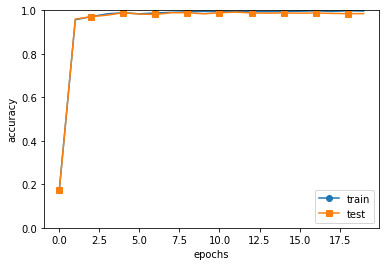

In [24]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 处理花费时间较长的情况下减少数据 
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 保存参数
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

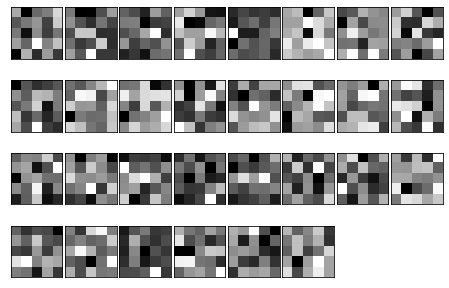

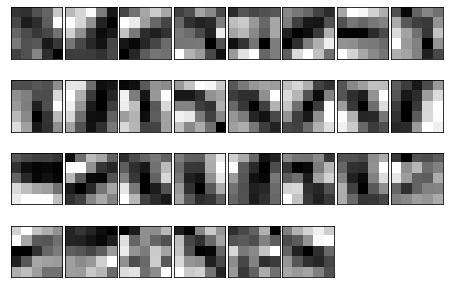

In [25]:
# 7.6 CNN的可视化
import numpy as np
import matplotlib.pyplot as plt
#from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 随机进行初始化后的权重
filter_show(network.params['W1'])

# 学习后的权重
network.load_params("params.pkl")
filter_show(network.params['W1'])

In [26]:
# 基于分层结构的信息提取


In [27]:
# 7.7 具有代表性的CNN
# LeNet
# AlexNet


In [ ]:
# 第8章 深度学习
# 8.1 加深网络


In [2]:
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *


class DeepConvNet:
    """识别率为99%以上的高精度的ConvNet

    网络结构如下所示
        conv - relu - conv- relu - pool -
        conv - relu - conv- relu - pool -
        conv - relu - conv- relu - pool -
        affine - relu - dropout - affine - dropout - softmax
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param_1 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_2 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_3 = {'filter_num':32, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_4 = {'filter_num':32, 'filter_size':3, 'pad':2, 'stride':1},
                 conv_param_5 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_6 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 hidden_size=50, output_size=10):
        # 初始化权重===========
        # 各层的神经元平均与前一层的几个神经元有连接（TODO:自动计算）
        pre_node_nums = np.array([1*3*3, 16*3*3, 16*3*3, 32*3*3, 32*3*3, 64*3*3, 64*4*4, hidden_size])
        wight_init_scales = np.sqrt(2.0 / pre_node_nums)  # 使用ReLU的情况下推荐的初始值
        
        self.params = {}
        pre_channel_num = input_dim[0]
        for idx, conv_param in enumerate([conv_param_1, conv_param_2, conv_param_3, conv_param_4, conv_param_5, conv_param_6]):
            self.params['W' + str(idx+1)] = wight_init_scales[idx] * np.random.randn(conv_param['filter_num'], pre_channel_num, conv_param['filter_size'], conv_param['filter_size'])
            self.params['b' + str(idx+1)] = np.zeros(conv_param['filter_num'])
            pre_channel_num = conv_param['filter_num']
        self.params['W7'] = wight_init_scales[6] * np.random.randn(64*4*4, hidden_size)
        self.params['b7'] = np.zeros(hidden_size)
        self.params['W8'] = wight_init_scales[7] * np.random.randn(hidden_size, output_size)
        self.params['b8'] = np.zeros(output_size)

        # 生成层===========
        self.layers = []
        self.layers.append(Convolution(self.params['W1'], self.params['b1'], 
                           conv_param_1['stride'], conv_param_1['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W2'], self.params['b2'], 
                           conv_param_2['stride'], conv_param_2['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Convolution(self.params['W3'], self.params['b3'], 
                           conv_param_3['stride'], conv_param_3['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W4'], self.params['b4'],
                           conv_param_4['stride'], conv_param_4['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Convolution(self.params['W5'], self.params['b5'],
                           conv_param_5['stride'], conv_param_5['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W6'], self.params['b6'],
                           conv_param_6['stride'], conv_param_6['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Affine(self.params['W7'], self.params['b7']))
        self.layers.append(Relu())
        self.layers.append(Dropout(0.5))
        self.layers.append(Affine(self.params['W8'], self.params['b8']))
        self.layers.append(Dropout(0.5))
        
        self.last_layer = SoftmaxWithLoss()

    def predict(self, x, train_flg=False):
        for layer in self.layers:
            if isinstance(layer, Dropout):
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x, train_flg=True)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx, train_flg=False)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        tmp_layers = self.layers.copy()
        tmp_layers.reverse()
        for layer in tmp_layers:
            dout = layer.backward(dout)

        # 设定
        grads = {}
        for i, layer_idx in enumerate((0, 2, 5, 7, 10, 12, 15, 18)):
            grads['W' + str(i+1)] = self.layers[layer_idx].dW
            grads['b' + str(i+1)] = self.layers[layer_idx].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, layer_idx in enumerate((0, 2, 5, 7, 10, 12, 15, 18)):
            self.layers[layer_idx].W = self.params['W' + str(i+1)]
            self.layers[layer_idx].b = self.params['b' + str(i+1)]


In [3]:
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from deep_convnet import DeepConvNet
from common.trainer import Trainer

# 开始时间 2020/30/12 16:00
#

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()  
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=20, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 保存参数
network.save_params("deep_convnet_params.pkl")
print("Saved Network Parameters!")

train loss:2.322156886353913
=== epoch:1, train acc:0.127, test acc:0.142 ===
train loss:2.300906055579133
train loss:2.279349120568929
train loss:2.273920013811468
train loss:2.260374906262916
train loss:2.273950765652722
train loss:2.2553510042179004
train loss:2.2515685853447094
train loss:2.241791308609802
train loss:2.2690657947304875
train loss:2.2546024938487177
train loss:2.228363424122237
train loss:2.1768480332774494
train loss:2.204725696329932
train loss:2.203103769396089
train loss:2.1317897648911552
train loss:2.218855265966909
train loss:2.1573115989194798
train loss:2.0658688798282525
train loss:2.145956441237658
train loss:2.112340064439502
train loss:2.099898520282849
train loss:2.0758529277807707
train loss:1.9573745535064346
train loss:2.0467801906732497
train loss:2.054521707541405
train loss:2.09412312802795
train loss:1.9855166480011623
train loss:2.0386864009763515
train loss:2.0611484583948196
train loss:1.916858188152461
train loss:1.9698702705054192
train los

train loss:1.3851802383466716
train loss:1.3750156060707663
train loss:1.4560404030219738
train loss:1.248289240332672
train loss:1.248804092798191
train loss:1.1506293129469425
train loss:1.3476446854269417
train loss:1.2434738320952314
train loss:1.165116909310695
train loss:1.2329053833281014
train loss:1.4669460800224365
train loss:1.4804027597528056
train loss:1.162581692332465
train loss:1.4049598954163307
train loss:1.1809034866282082
train loss:1.1366979348869863
train loss:1.2207406550450046
train loss:1.1978776099601545
train loss:1.1664665967004633
train loss:1.247147534888372
train loss:1.1519744100385934
train loss:1.4381832247425013
train loss:1.119995299054236
train loss:1.168094561061739
train loss:1.0945185086308915
train loss:1.2843911780696196
train loss:1.2826012907867281
train loss:1.0594764315462895
train loss:1.2259903850709006
train loss:1.2727975852149855
train loss:1.2471402008102692
train loss:1.2382411638392
train loss:1.433797596110712
train loss:1.20514939

train loss:1.302524814549991
train loss:0.8652615501606518
train loss:0.9426570083444712
train loss:1.0192557023440667
train loss:1.1660022108600556
train loss:1.1836336215787373
train loss:1.3337490402074794
train loss:1.1466897259997404
train loss:1.282534282885325
train loss:0.9817289043449658
train loss:1.1043547931485123
train loss:0.9639464720088102
train loss:1.021722143772599
train loss:1.037965926400939
train loss:1.1704049140196857
train loss:1.1252196098899814
train loss:1.0572360980222368
train loss:1.0303731136148706
train loss:1.0861735220286781
train loss:1.2723964083249013
train loss:1.1448968449207393
train loss:1.0940257883617368
train loss:1.329830457763344
train loss:1.1696188194960477
train loss:1.1045251050582074
train loss:1.2528875624736733
train loss:1.149159093268875
train loss:1.0710875534897493
train loss:1.2643226148403806
train loss:1.1391624043282311
train loss:1.27162271123657
train loss:1.116446181755823
train loss:1.019482662412458
train loss:1.1100042

train loss:1.0144706147963174
train loss:1.037387597043324
train loss:1.0987826359860602
train loss:1.1633532208081185
train loss:0.8845879021771207
train loss:1.2658720518408286
train loss:0.979067136292126
train loss:1.109176427984227
train loss:0.9846129956695252
train loss:1.1321195176729995
train loss:1.014651599833903
train loss:1.064186938333358
train loss:1.095494811220455
train loss:1.040076677494374
train loss:0.9400142290382888
train loss:1.0293642988464842
train loss:1.1145611077579367
train loss:1.0236416007942881
train loss:0.9967931907058986
train loss:1.0962370834524378
train loss:1.1522596995906411
train loss:0.9044491745643558
train loss:0.9303680430615993
train loss:1.13081259443769
train loss:1.0733581572887971
train loss:1.0188552507873183
train loss:1.004658014658092
train loss:1.0322706749679411
train loss:1.2005593048540955
train loss:1.0507581525885974
train loss:0.908486192979034
train loss:0.8564504164056003
train loss:1.1545824952045174
train loss:1.06514013

train loss:1.043206525659677
train loss:1.0875044896899653
train loss:1.0621256410576871
train loss:1.0075010321934808
train loss:1.0788609723288294
train loss:0.8895848326152028
train loss:0.9095898730810267
train loss:1.0985891549337539
train loss:0.8869788209063535
train loss:0.9607103955120432
train loss:0.8953853448712927
train loss:0.9861696110655488
train loss:1.1478963895292047
train loss:1.0925459440032137
train loss:0.9639381780547802
train loss:1.1767287371056916
train loss:1.0974489307898951
train loss:1.016725093617097
train loss:0.8921841601781695
train loss:0.9968641873192453
train loss:0.9693729481733854
train loss:1.0989598095933382
train loss:1.0098427597758521
train loss:0.8334470449172684
train loss:0.9423634355538362
train loss:1.0956408892876526
train loss:0.8131283101469087
train loss:1.0273313974834424
train loss:0.8910620646681653
train loss:1.0358077421423173
train loss:1.0860296433371384
train loss:0.8090628276746373
train loss:1.021379272931802
train loss:1.

train loss:1.097902644702257
train loss:0.9807845318275319
train loss:0.846816396709271
train loss:0.9477051538450881
train loss:0.9642970142205409
train loss:0.8856322816288467
train loss:1.0301333193293183
train loss:0.9938939215819734
train loss:1.046317459888772
train loss:1.000272022349399
train loss:1.0559401409687244
train loss:0.9348025177914643
train loss:0.9858294463666044
train loss:0.901985701804006
train loss:0.8278186714276405
train loss:0.8627670511979002
train loss:0.8160920490883511
train loss:1.0916106556620802
train loss:1.0462347512070747
train loss:0.941919459949477
train loss:1.0119841091797561
train loss:0.8681455076925182
train loss:1.060681807146697
train loss:1.0671568032811785
train loss:0.9914847029486695
train loss:0.8344704635398104
train loss:0.889106672044733
train loss:0.9693705066380042
train loss:0.949163213623424
train loss:1.0329136523149411
train loss:0.9694536777281741
train loss:1.0567334435855746
train loss:1.157385454855945
train loss:0.6836731

train loss:0.9613249513065341
train loss:1.0579890983036884
train loss:0.9364534915972791
train loss:1.0534871971024335
train loss:1.1027143337886107
train loss:1.2122824777474464
train loss:0.9315794540219459
train loss:1.0559045463603305
train loss:1.0400086281591563
train loss:0.8709829202721113
train loss:0.8425630611262105
train loss:0.9614478175412207
train loss:0.9827994469529326
train loss:1.0781850504546897
train loss:1.0343152472096897
train loss:0.9790763207649253
train loss:0.9845948448265616
train loss:0.7905075984417604
train loss:1.0202124783200726
train loss:1.0647050513301937
train loss:1.047362484660902
train loss:1.0311417893460066
train loss:0.9243105081032233
train loss:0.9415425464897734
train loss:1.1353697776421188
train loss:1.0074962491170496
train loss:0.923789389180484
train loss:0.9186251699494364
train loss:1.001736335114351
train loss:1.0332703340659974
train loss:0.8686518594660069
train loss:0.8888358125542837
train loss:0.9376434189628512
train loss:0.

train loss:0.8585483812200685
train loss:1.020227972197298
train loss:1.0169688179371277
train loss:0.9479411661554935
train loss:0.829146474900184
train loss:0.9866358685906442
train loss:0.828247764271482
train loss:0.8627506357344149
train loss:1.0239761458993624
train loss:0.9067637790190963
train loss:0.8678014468394936
train loss:1.1321866790356754
train loss:1.0817039638781443
train loss:0.9946299795702725
train loss:0.9775993745555627
train loss:0.920737522359833
train loss:0.9181085297343253
train loss:0.9047529145072802
train loss:0.865476743801063
train loss:0.9276853946995264
train loss:0.9610670820866295
train loss:1.0071281727340757
train loss:1.0608224930220091
train loss:1.1112310042400158
train loss:0.8933560976427845
train loss:0.8859179442712803
train loss:1.0574380071999738
train loss:0.848735276519715
train loss:0.835270879081901
train loss:0.9842492290694941
train loss:0.9002683639713608
train loss:0.8897888523404679
train loss:0.9246749506124555
train loss:1.0079

train loss:0.8433728244136677
train loss:1.1103099577097368
train loss:0.7999123711039076
train loss:0.9236557311481154
train loss:0.9844048113064388
train loss:0.9195904871677911
train loss:0.8660193142640528
train loss:0.9687831808564372
train loss:0.8366906807915855
train loss:1.067893399465572
train loss:1.0426471465795724
train loss:1.0989559889724168
train loss:0.8591021383257327
train loss:0.9191285531913351
train loss:0.8311482625624907
train loss:0.9120219672078547
train loss:0.9794181144828478
train loss:0.783083270131099
train loss:0.8934543343236266
train loss:0.7939807684040916
train loss:0.9903918406789763
train loss:1.155066884685395
train loss:1.0100215914616195
train loss:0.9373726031661781
train loss:0.7866114169662717
train loss:1.1091221696005849
train loss:0.9227568804743123
train loss:0.9692054649898726
train loss:1.0378717708597343
train loss:0.9890609859160961
train loss:0.8577557412314709
train loss:0.7639906956366821
train loss:0.959187915328005
train loss:0.9

train loss:1.0921876909932797
train loss:1.1704911235239635
train loss:0.8886780032689758
train loss:1.1421882205501206
train loss:1.0493364135216787
train loss:1.216255875995958
train loss:0.9646416880189309
train loss:0.9886497541572394
train loss:0.9919913033192269
train loss:1.0020994406734767
train loss:0.9027382662223203
train loss:0.9044220866596624
train loss:0.9900722788201348
train loss:0.7990351338347154
train loss:0.8665692910293593
train loss:1.1696438603360082
train loss:1.0005093488986871
train loss:0.9145939660833159
train loss:0.8646562267328106
train loss:0.7305289428569735
train loss:0.957016850469532
train loss:0.9226698797174592
train loss:1.0086091915256936
train loss:0.969025273312665
train loss:0.9436585127793573
train loss:0.952042395852446
train loss:1.0030096732422067
train loss:0.8006134739127145
train loss:1.0765441914890617
train loss:0.8569864633477619
train loss:0.9818031390896244
train loss:0.8990781857219836
train loss:0.9776286306290985
train loss:0.9

train loss:0.9371889930917895
train loss:0.9092108094832787
train loss:0.9558934355194281
train loss:0.8830328398539481
train loss:0.9602395242356064
train loss:0.9017088677098449
train loss:0.8702475958627243
train loss:0.8866585552883472
train loss:0.9424129161785209
train loss:0.6766450756067782
train loss:0.7962578838639341
train loss:0.9093807072315543
train loss:0.807021760524659
train loss:0.8815441771250103
train loss:0.9444914253187952
train loss:0.8624580278133754
train loss:0.9213879749416531
train loss:0.7987394467625444
train loss:0.9162242616252178
train loss:0.9456548822589573
train loss:0.9498463086900295
train loss:0.8332939467358839
train loss:0.7769954789654355
train loss:0.7088256204361353
train loss:0.8731996569122726
train loss:0.938629463065099
train loss:1.0321347177504456
train loss:0.8649651540697816
train loss:0.9160827443360613
train loss:0.9032867197269803
train loss:0.8687972472252583
train loss:0.7263591811663234
train loss:1.0585306085591257
train loss:0

train loss:1.0483880823818574
train loss:0.8719999627125139
train loss:0.9462010944231137
train loss:1.0357530076959005
train loss:0.8541699757244752
train loss:0.9908009711208264
train loss:0.8947202985953827
train loss:0.9807454429008439
train loss:1.0305297309742418
train loss:1.0960095350116246
train loss:0.9603909646475058
train loss:0.9692936782998597
train loss:0.9213291518715048
train loss:0.9476990270241168
train loss:0.8281317953713261
train loss:0.8314192531554674
train loss:0.8301312971079328
train loss:1.0737190795752678
train loss:0.6585867801457848
train loss:0.9151927485422877
train loss:0.8034883778391351
train loss:0.9820395959520214
train loss:0.9054765196708897
train loss:0.9691582826203295
train loss:0.9515796255280152
train loss:0.8177364987449093
train loss:0.9186909651677072
train loss:0.9340403374264212
train loss:0.9146612978161063
train loss:0.9196374955277643
train loss:1.0127249790458697
train loss:0.9749256751587799
train loss:0.9807672437326984
train loss

train loss:0.9175695066146012
train loss:0.9101095732006607
train loss:0.802283784838302
train loss:0.7019663231418933
train loss:0.9530083106994792
train loss:0.8172253903679259
train loss:0.9000487338712183
train loss:1.0041031069915283
train loss:0.986640850621083
train loss:0.8769874439265731
train loss:0.9983697842224004
train loss:0.9328619480658135
train loss:0.9776535819033724
train loss:0.8203821542167549
train loss:0.8261442729755522
train loss:0.9565753765388785
train loss:0.7331351684334299
train loss:0.8395376342455559
train loss:0.8682861460195318
train loss:0.8763579873828502
train loss:0.7876750088257048
train loss:0.7702552995267321
train loss:0.9056361475911724
train loss:0.7623570128643721
train loss:0.9423087212646856
train loss:0.863292225021012
train loss:0.7142070155325103
train loss:0.891085862732006
train loss:0.9268838355929649
train loss:0.9445621592159142
train loss:0.8688603369477131
train loss:0.6755558888303278
train loss:0.8403767858286132
train loss:0.8

train loss:0.9104763451947352
train loss:0.7963827437842703
train loss:0.808484266513213
train loss:0.7504229784539453
train loss:0.7838610982213801
train loss:0.8661940441292184
train loss:1.05105946753842
train loss:0.9193318932545625
train loss:0.8492559819340151
train loss:1.0808702148162765
train loss:0.9841847360214565
train loss:0.9814635195352949
train loss:0.8767772990996783
train loss:0.8379904886752939
train loss:0.9408457347665817
train loss:0.8379659554588739
train loss:1.0890497249821194
train loss:0.8278944141792627
train loss:0.8105282475126036
train loss:0.825619239126591
train loss:0.6486761034547973
train loss:1.0094770192455242
train loss:0.750611894671772
train loss:0.9756085806575452
train loss:0.8880483172167843
train loss:0.7942490697310741
train loss:0.7397943754882103
train loss:0.7834336865032338
train loss:1.0233874614735474
train loss:1.0879913816161986
train loss:0.8594754052146514
train loss:0.9030336745087201
train loss:0.9118021647686934
train loss:0.76

train loss:1.0677461268071449
train loss:1.0771653054244148
train loss:0.8422997529696665
train loss:0.9809752780848437
train loss:0.9509831592230387
train loss:0.804898247056264
train loss:0.8305432115442803
train loss:0.7847773041987611
train loss:0.9897556002039394
train loss:0.8465097730421631
train loss:0.9006942723554985
train loss:0.857871669171201
train loss:0.8320764382824004
train loss:0.9894598660503489
train loss:0.8642477433989102
train loss:1.0059634144437444
train loss:0.8986712807754504
train loss:1.1517428232771203
train loss:0.7766351078272506
train loss:0.956460799844636
train loss:0.993750071389702
train loss:0.9170360592627957
train loss:0.8266218416325417
train loss:0.9456774373055623
train loss:0.9027805641235205
train loss:0.8434036415051017
train loss:0.8068787808039979
train loss:0.7983529580329854
train loss:0.8142284360368128
train loss:0.8876465876749006
train loss:1.0054518256959277
train loss:1.1384020847383765
train loss:0.6819059185617614
train loss:0.8

train loss:0.8640411208015019
train loss:0.8996281518910142
train loss:1.0667341467866203
train loss:0.7444809036010444
train loss:0.9333552195367755
train loss:0.8321127930968184
train loss:0.8935176365420682
train loss:0.895389944846939
train loss:0.9037817651365561
train loss:0.8563052138585603
train loss:0.7913061204835228
train loss:0.8916277886462929
train loss:0.8716759460406219
train loss:0.8233801238372638
train loss:0.8901803047712917
train loss:0.8893315638235946
train loss:0.9770314409588997
train loss:0.8931090439305374
train loss:0.9312263722915206
train loss:0.82185436541566
train loss:0.8754426350392519
train loss:0.8890101028957952
train loss:0.9435265273391928
train loss:1.0286758385345605
train loss:0.9376420375790936
train loss:1.0223794879396337
train loss:0.8984428036088348
train loss:0.8969995909705125
train loss:0.7732176109758073
train loss:1.1171777427890746
train loss:0.9201734285145358
train loss:0.9471328556668912
train loss:0.7590558098779071
train loss:0.

train loss:0.9643464619213262
train loss:0.7459178980686704
train loss:0.890598176907516
train loss:0.8562269802836959
train loss:0.8538365635550222
train loss:1.0213241067666587
train loss:1.0775535423903313
train loss:0.8837740915372179
train loss:0.89410438151735
train loss:0.7381608166131879
train loss:0.8570797207592611
train loss:0.9228674811236526
train loss:0.8539988324078144
train loss:0.8636986948050843
train loss:1.050343037763639
train loss:0.9812631329853124
train loss:1.13153671595751
train loss:0.8439032883109222
train loss:0.8868827543630637
train loss:0.9378748284087846
train loss:0.6614667288846935
train loss:0.9791777230573854
train loss:0.73509493392935
train loss:0.7688228053839257
train loss:0.8201489029088175
train loss:0.9095722103214241
train loss:0.9733577818919684
train loss:0.9665390198394129
train loss:0.9223182605788329
train loss:0.9734166452973265
train loss:0.9064335967927655
train loss:0.8938385312784953
train loss:0.9300551714222673
train loss:0.92563

train loss:0.9828380971550466
train loss:0.8171854775147491
train loss:1.05260834502286
train loss:0.8891081295725101
train loss:0.9148923670510072
train loss:0.6283106832400202
train loss:0.908923480179283
train loss:0.9294407320807848
train loss:0.8863254967161255
train loss:0.913785846949069
train loss:1.0392484180394792
train loss:0.8176225390505322
train loss:0.9436673245694382
train loss:0.8105028992740348
train loss:0.8996520757885439
train loss:0.866704470249958
train loss:0.7901106621913055
train loss:0.9424920888023793
train loss:0.9665315384547418
train loss:1.0473051297568636
train loss:0.99451287525886
train loss:0.8657605869981105
train loss:0.8838627936861646
train loss:0.8664456417069752
train loss:0.7275469887453505
train loss:1.2196668410963876
train loss:0.9001007819927973
train loss:0.7183465969875269
train loss:0.86955630267719
train loss:0.7481235844080638
train loss:0.8241527137657141
train loss:0.9144630027916891
train loss:0.969917939148553
train loss:1.0265335

train loss:1.0305181752683448
train loss:0.9532741556746768
train loss:0.8766059535121283
train loss:0.9329059027414995
train loss:0.93726470016725
train loss:0.9628137188268755
train loss:0.9127603502882932
train loss:0.95201071641145
train loss:0.821996969576373
train loss:1.017742728464964
train loss:0.9145607301377597
train loss:0.9183311411027002
train loss:0.9386846686033457
train loss:0.9514532104446958
train loss:0.7436763275426442
train loss:0.7870697530994839
train loss:0.7922899822859283
train loss:0.8514480264357879
train loss:0.9274618165214135
train loss:0.9518658317634912
train loss:1.0359023628888528
train loss:0.8668089950852159
train loss:1.049079376526017
train loss:0.7291221105098745
train loss:0.9440687845868951
train loss:0.894570942178776
train loss:0.9562115119011891
train loss:0.9915479190859412
train loss:0.9471628976608528
train loss:0.9638930268298407
train loss:0.9965855116088985
train loss:0.8660073441929219
train loss:0.7365237187084277
train loss:1.06253

train loss:1.03118442744332
train loss:0.8450313673280617
train loss:0.8111152766547343
train loss:1.0373880950861196
train loss:0.939138796337909
train loss:0.720018989103783
train loss:0.773321100892196
train loss:0.7728771342813733
train loss:0.8637753657165613
train loss:0.8472612062844596
train loss:0.8453287166165118
train loss:0.7288457953243102
train loss:0.8670008493133889
train loss:0.9230307787390195
train loss:0.8713755556545906
train loss:0.8171196044700789
train loss:1.024713812160163
train loss:0.8308373472658799
train loss:0.7793219090192589
train loss:0.8744181470543295
train loss:0.9022265068190438
train loss:0.7689292855124866
train loss:0.9106597717458262
train loss:0.8877142033074006
train loss:1.0757761089218862
train loss:0.9328496796757965
train loss:0.8576247909895645
train loss:0.8307101519572256
train loss:0.8178605067296374
train loss:0.9197955851078672
train loss:0.8623316117540939
train loss:0.8940663430603598
train loss:0.8032284162243886
train loss:0.874

train loss:0.8654633923266062
train loss:0.8731592062112274
train loss:0.7803300290342879
train loss:1.0095503142853142
train loss:0.7684151540021662
train loss:0.9180335017474144
train loss:0.8168232784493771
train loss:0.8931546252522554
train loss:0.7970879017364476
train loss:0.7942721967529277
train loss:0.9034070957762688
train loss:0.8845139806951472
train loss:0.8731243959152808
train loss:0.9492212008095271
train loss:0.782329236982704
train loss:0.9366984034122106
train loss:0.9571818830353073
train loss:0.8856307101129485
train loss:0.7947430183490793
train loss:1.090635104575921
train loss:0.8449731945376061
train loss:0.9316866996243484
train loss:0.8207639914047513
train loss:0.8314291608710878
train loss:0.9117217409944005
train loss:1.0280070954070628
train loss:0.9371073875312045
train loss:0.7224844013901179
train loss:0.828739922218203
train loss:0.8251984317566042
train loss:1.0718010696427243
train loss:0.8117747802595694
train loss:0.8906222554416141
train loss:0.

train loss:0.775978446291965
train loss:0.8778581873848583
train loss:0.8099481097615712
train loss:0.8081954089241797
train loss:0.9424618620650397
train loss:0.8898493738391486
train loss:0.8528099351825369
train loss:0.9417163849656295
train loss:1.0236574627057475
train loss:1.1360251799746666
train loss:0.7474806952554196
train loss:0.9315688301319658
train loss:0.9580932633947475
train loss:0.9681427341286128
train loss:0.8166454900967635
train loss:1.0129371198100134
train loss:0.6742487006475085
train loss:0.8272684346361538
train loss:1.0136559860485117
train loss:0.9176591499026092
train loss:0.8330079922940066
train loss:0.9437658551126011
train loss:0.7633249316190046
train loss:0.7882890143739328
train loss:1.0107110600075213
train loss:0.8003352334511188
train loss:0.7215749859143304
train loss:0.8301972392683085
train loss:0.9923949360691005
train loss:1.0093964810905103
train loss:0.8567255754945946
train loss:0.845771884381108
train loss:0.8854010841079326
train loss:0

train loss:1.043541187921918
train loss:0.8786476552008955
train loss:0.8477028612548021
train loss:0.7471063373917501
train loss:1.0241931995507139
train loss:0.9504362942519657
train loss:0.8814655995534912
train loss:0.9771028956347155
train loss:0.8810686759957267
train loss:0.828721858838849
train loss:0.8434956200992579
train loss:0.9079549704872792
train loss:0.7893399028721413
train loss:0.7695774426732733
train loss:0.9743856028743473
train loss:0.8740572935885649
train loss:0.9608868491081884
train loss:0.7244284677739017
train loss:0.8716221845032248
train loss:0.9252030044422501
train loss:0.9114572910879167
train loss:0.9090056733649324
train loss:0.945759284857239
train loss:1.0019326744446402
train loss:0.8492670196516879
train loss:0.863679509044461
train loss:0.9852476140291698
train loss:0.8495457789115288
train loss:0.8621326716673411
train loss:0.8723801481738965
train loss:1.0585706664499608
train loss:0.9468816817615042
train loss:0.9396088059256731
train loss:0.8

train loss:0.8121602546671726
train loss:0.7769742917913764
train loss:0.995454798864142
train loss:0.856891089135881
train loss:0.6899188813812277
train loss:0.8724901951102049
train loss:0.8856082465959412
train loss:0.9472602522748379
train loss:0.9378173973158027
train loss:0.8735648405538398
train loss:1.04860818090588
train loss:0.7938017477675977
train loss:0.8321152470420514
train loss:0.81540227104405
train loss:0.880678985467154
train loss:0.8454656191120677
train loss:0.8714083808162537
train loss:0.9936742485202567
train loss:0.8088199766559859
train loss:0.8717732172100828
train loss:0.9326908561310219
train loss:0.9628178180982971
train loss:1.015147167693027
train loss:0.9061646371936949
train loss:0.881689360634089
train loss:0.8249829842371369
train loss:0.8405504994088864
train loss:0.861985215312379
train loss:0.791131985286748
train loss:0.9347576620863847
train loss:0.85591617316526
train loss:0.8416907809004802
train loss:0.9190796406126408
train loss:0.9543306971

train loss:0.909772326813098
train loss:0.8354922251478023
train loss:1.0904790883141526
train loss:0.7824887751055691
train loss:0.9518072794834108
train loss:0.8882376741942163
train loss:0.8630246336651227
train loss:0.918436088747977
train loss:0.7548888501534514
train loss:0.9386341771107989
train loss:0.9219887030285201
train loss:0.7455118067348699
train loss:0.9255031961009879
train loss:0.9359466015439765
train loss:0.9790572941445969
train loss:0.844992451378471
train loss:0.8720786676588209
train loss:0.9547163313020787
train loss:0.9765857230389282
train loss:0.8269205488418927
train loss:0.8677328234141103
=== epoch:12, train acc:0.995, test acc:0.994 ===
train loss:0.9194891073990858
train loss:0.7555517232037707
train loss:0.814272302145623
train loss:1.1480096394382402
train loss:0.8482736455967799
train loss:0.7784951014401656
train loss:0.7729325329079818
train loss:0.8408740030284738
train loss:0.8239153531637716
train loss:0.7674732239050622
train loss:0.81266017831

train loss:0.911252533893909
train loss:0.8402830503595254
train loss:0.8300810000186136
train loss:0.7703665113602072
train loss:0.8916533919558565
train loss:0.9823398544147078
train loss:0.824195143196484
train loss:1.0242234230594927
train loss:0.9396701686150919
train loss:0.8939470196576282
train loss:0.7419949824138574
train loss:0.8271212426612706
train loss:0.8365553361985744
train loss:0.9040590925220564
train loss:0.8513714304323574
train loss:0.9184216898075254
train loss:1.0177561551962933
train loss:0.8362803717008517
train loss:0.9486752876405317
train loss:0.7461316345658753
train loss:0.8144117214464707
train loss:0.8868134517326876
train loss:0.8727562829116503
train loss:0.9836818583579191
train loss:0.9589314830297853
train loss:0.9637231530709169
train loss:0.7818894121239893
train loss:0.8550258672898629
train loss:0.930533835332898
train loss:0.9206567794598116
train loss:0.804263728967355
train loss:0.8922756967577773
train loss:0.9925905316595138
train loss:0.8

train loss:0.9538346350765875
train loss:1.0996905999517799
train loss:0.7817880486427523
train loss:0.7430696735528626
train loss:0.8323282071282325
train loss:0.8571743460180943
train loss:0.984043599610978
train loss:0.8272830352562246
train loss:0.7650933361681765
train loss:0.9491208731339235
train loss:1.0902326805709093
train loss:0.9243543686500268
train loss:0.8750109051722167
train loss:0.8704753243381775
train loss:0.9117177825496432
train loss:0.9557231811811684
train loss:0.8548350012962868
train loss:0.997267931617015
train loss:0.96459300885854
train loss:0.7814804152173295
train loss:0.9439122491323754
train loss:0.8021166410740709
train loss:1.0153859509411765
train loss:0.8837950699576038
train loss:0.6591110676271724
train loss:1.0257560926124678
train loss:1.0883699597092802
train loss:0.9192334266137121
train loss:0.7758036743491903
train loss:0.8095992679402041
train loss:0.6598955365583654
train loss:0.948835813721957
train loss:0.8053010529932731
train loss:0.79

train loss:0.767589586657257
train loss:0.8390904605288156
train loss:1.010545864515466
train loss:0.7825573402692859
train loss:1.052339910335682
train loss:0.8312589414349877
train loss:1.0108402140976829
train loss:0.8891184975400331
train loss:0.8650399062279555
train loss:0.8654933843562662
train loss:0.8518978598401539
train loss:0.7821102909347175
train loss:0.9142543235526174
train loss:0.8478333888062682
train loss:1.0114998068575403
train loss:0.9764884480412218
train loss:0.7834229078184343
train loss:0.8721392435560356
train loss:0.7745664396478296
train loss:0.8558647842622452
train loss:0.9527249652256877
train loss:0.8300495753245325
train loss:0.9477291373616459
train loss:0.8594748062852327
train loss:0.897517666372443
train loss:0.826126310452089
train loss:0.8416451274446175
train loss:0.942525234366054
train loss:1.002421908434909
train loss:0.885947240605588
train loss:0.891865731588012
train loss:0.8739078757148873
train loss:0.9017496243824696
train loss:0.848833

train loss:0.88487371098155
train loss:0.7793746221502965
train loss:1.0006287321611609
train loss:0.87840589834805
train loss:0.9479684159186198
train loss:0.7526754495621865
train loss:0.965840837846173
train loss:0.9694713450121338
train loss:0.9575532257766998
train loss:0.7708767912378804
train loss:0.9348541334170715
train loss:0.9203865830258671
train loss:0.7871085457441858
train loss:0.9205170063384789
train loss:0.8235870220802721
train loss:0.7299909522917828
train loss:0.7280990064922426
train loss:0.742451903389438
train loss:0.9104290494394336
train loss:0.7978861668621736
train loss:0.9343731405532238
train loss:0.8758821394021749
train loss:1.0063042962347388
train loss:0.7296571498448177
train loss:0.9438578318686947
train loss:0.8872224372558007
train loss:0.7324908420694304
train loss:0.8761797727161407
train loss:0.8653990688088617
train loss:0.9770774310391621
train loss:1.0097426249268695
train loss:0.7827460041275351
train loss:0.8673915545705414
train loss:0.820

train loss:0.6557349716070462
train loss:0.9276450691256062
train loss:0.9688708984658245
train loss:0.9177005483430656
train loss:0.8282231347226019
train loss:0.8697193394015582
train loss:0.7576152543596614
train loss:0.8576875994457726
train loss:0.8711536203216483
train loss:0.7971017898428131
train loss:1.0081794724479791
train loss:0.8956197210365893
train loss:0.7843922066438043
train loss:0.8012038731523622
train loss:0.7791245701873266
train loss:0.9048419996220487
train loss:0.8370058707561663
train loss:0.8128440352850725
train loss:0.8425986002829507
train loss:0.9297197632341205
train loss:0.8325966041710567
train loss:0.8852497502080916
train loss:0.8385029758997562
train loss:0.8735203464818898
train loss:0.9206478506546766
train loss:0.8358709590631013
train loss:0.8715461760237311
train loss:0.9695298151871623
train loss:0.9413581142748672
train loss:1.0309321040594792
train loss:0.7519020543191786
train loss:0.841442744657126
train loss:0.9302071492990275
train loss:

train loss:0.7737277313244687
train loss:0.707690813572318
train loss:1.0462996494594101
train loss:1.0101474079330974
train loss:0.8163672935963595
train loss:0.9057140290585418
train loss:0.9008264320044321
train loss:0.9272770304995704
train loss:0.7491491690716843
train loss:0.8846291663060599
train loss:0.8256256997900728
train loss:0.8863790017576583
train loss:0.7998046461720202
train loss:1.0234758744778862
train loss:0.8701272866569435
train loss:0.7806486306466734
train loss:0.7899879361920799
train loss:0.9854129267610847
train loss:0.8671551446692208
train loss:0.9099049382360195
train loss:0.7697830012763248
train loss:0.8229850088955779
train loss:0.9231889702269298
train loss:0.8642028829098483
train loss:1.0013338319183809
train loss:1.0215123780215905
train loss:0.8311122447973355
train loss:0.7649820492145486
train loss:0.8992490070606014
train loss:0.7627025278379607
train loss:0.8590368016773889
train loss:0.9380208249915285
train loss:0.9071270151491652
train loss:

train loss:0.9298731903542573
train loss:0.8329309237525722
train loss:0.8583818603649624
train loss:0.8110569578839372
train loss:0.8549691464910748
train loss:0.7648969807934684
train loss:0.9137054915203349
train loss:0.9577179179019041
train loss:0.8855008885100979
train loss:0.9680926643068579
train loss:0.8135001925020465
train loss:0.8435207432213676
train loss:0.9307615870360831
train loss:0.7794477795293099
train loss:0.8973806282592869
train loss:0.7679613560519266
train loss:0.7653837613676511
train loss:0.7719016587732885
train loss:0.7470249301346747
train loss:0.7221048912478829
train loss:0.8968429901643585
train loss:0.8801081579170357
train loss:1.01124214520192
train loss:0.7689900245003533
train loss:0.7167019628873419
train loss:0.7158536814385544
train loss:0.7962816927456765
train loss:0.7555982653789141
train loss:1.0290710582724687
train loss:0.7066129377726277
train loss:0.938167148263883
train loss:0.8806154351928573
train loss:0.7308039167901441
train loss:0.

train loss:0.9564988733590987
train loss:0.7598356279679157
train loss:0.9386033823180812
train loss:0.780112663752265
train loss:0.9700572764797388
train loss:0.9014900909314099
train loss:0.9399128389136964
train loss:0.9106101670906309
train loss:0.8252242269430594
train loss:0.8172866245586691
train loss:0.9443451449844337
train loss:0.7300877090082463
train loss:1.0493672438547343
train loss:0.8528595996319727
train loss:1.0087218914888862
train loss:0.9449326726299624
train loss:1.1573872566497478
train loss:0.7658014214802522
train loss:0.842236334062107
train loss:0.8815854764391166
train loss:0.9318280308092968
train loss:0.8174177052971687
train loss:0.8251933782977452
train loss:0.8792659714445556
train loss:0.8937393212135635
train loss:0.7412316639499297
train loss:0.9832648877486408
train loss:0.8020347427490451
train loss:0.8814672312267322
train loss:0.8769349720912697
train loss:0.944677370118148
train loss:0.829823859411041
train loss:0.7911865016008511
train loss:0.8

train loss:0.814960676582291
train loss:0.7907087080983151
train loss:0.9449792770465134
train loss:0.9945728798169572
train loss:0.8749570849683947
train loss:0.8971656914898442
train loss:0.803487625954532
train loss:0.8900778875826831
train loss:0.8903017743237212
train loss:0.9339826669485408
train loss:1.0997013311032753
train loss:0.9301383490024956
train loss:0.7833952176519163
train loss:0.8768263714333838
train loss:0.7929849339623406
train loss:0.8113171467250718
train loss:1.0261714489904596
train loss:0.9726198982253261
train loss:0.8597922142867934
train loss:0.7116532493994024
train loss:0.9180323996528675
train loss:0.8810998443124762
train loss:0.9929662301578892
train loss:0.8359275351835165
train loss:1.0466507321494598
train loss:0.7677978145786435
train loss:1.008045870105823
train loss:0.8850783910944213
train loss:0.90494407253271
train loss:0.8575251181883017
train loss:0.7302510103142555
train loss:0.8496301049243964
train loss:0.9226010017619097
train loss:0.75

train loss:0.8268629533469306
train loss:0.9449565269549359
train loss:0.9916104120199507
train loss:0.8818802361543338
train loss:0.9044768789325501
train loss:0.9124768208867813
train loss:0.8766461130027635
train loss:0.7319817708596931
train loss:0.9227994802260966
train loss:1.0153970480014285
train loss:0.654643834664935
train loss:0.9286436347681769
train loss:0.8600671946511247
train loss:0.8561124273737366
train loss:0.912811896702121
train loss:0.6390707632203134
train loss:0.9733914063653085
train loss:0.8627691570644069
train loss:0.746021975455975
train loss:0.9323304836312457
train loss:0.9576471619464697
train loss:0.7165124789593114
train loss:0.8286820135752164
train loss:0.7740973016694892
train loss:0.7954334662672486
train loss:0.6178895759226104
train loss:0.778735276341116
train loss:0.8479725563034893
train loss:0.7632460440679603
train loss:0.9733778101034015
train loss:0.8231612141040645
train loss:0.88338391086848
train loss:0.930756259851765
train loss:0.7810

train loss:0.8947707543868634
train loss:0.9124404174375954
train loss:0.9107568514960321
train loss:0.9883275829972594
train loss:0.908258332434307
train loss:0.8832507353334228
=== epoch:17, train acc:0.998, test acc:0.993 ===
train loss:0.9878207016613411
train loss:0.9471653297516714
train loss:1.0479217624314359
train loss:0.9125796443610236
train loss:0.7194188495639738
train loss:0.9435063057619463
train loss:0.9111834736674047
train loss:0.7405931973894576
train loss:0.9307378655112983
train loss:0.9547074565840721
train loss:0.7689276129994249
train loss:0.8687172223263003
train loss:0.8707088815824366
train loss:0.9616951074451096
train loss:0.8377848433485512
train loss:0.8977428814410944
train loss:0.9923031703629266
train loss:0.9278837402800039
train loss:0.7423701351355834
train loss:0.7760383400189756
train loss:0.9127737366218862
train loss:0.8201255008239844
train loss:0.8389771184295763
train loss:0.8334443587823179
train loss:0.9361546166734389
train loss:0.84807544

train loss:0.8409480035771816
train loss:0.8415696214637184
train loss:0.8291752923570822
train loss:0.8012523801542187
train loss:0.7763457414457682
train loss:0.6955773918802874
train loss:0.9790840238178792
train loss:0.8193500795118179
train loss:0.8940282569606954
train loss:0.8289825458530412
train loss:0.8496130392344005
train loss:0.9334784410498947
train loss:0.675439462738424
train loss:0.8877041604018611
train loss:0.9235294062562809
train loss:0.8541084112527194
train loss:0.72682690790004
train loss:0.8103880526632927
train loss:0.8868599853091566
train loss:0.774448143044816
train loss:0.7692892598323655
train loss:0.8073551607541841
train loss:0.8112379624165571
train loss:0.8124485162410409
train loss:0.911355049223992
train loss:0.9965473358193282
train loss:0.7907290178148325
train loss:0.9290943234552302
train loss:0.8461269884866609
train loss:0.8595628442529913
train loss:0.724081336458849
train loss:0.7380453903466883
train loss:0.8906789918248543
train loss:0.893

train loss:0.7490383734534839
train loss:0.8444088090749682
train loss:0.8544620334920495
train loss:0.903564231746865
train loss:0.8735728946414102
train loss:0.7916690064038793
train loss:0.8000579733344749
train loss:0.8933388913750403
train loss:1.0385753992667008
train loss:1.1013118387663925
train loss:0.8002682265842145
train loss:0.8258526240455352
train loss:0.9532403169212824
train loss:0.813951726526403
train loss:0.9131798122214808
train loss:0.7850958239848626
train loss:0.8864716644995707
train loss:0.8742871565536635
train loss:0.9354568830639248
train loss:0.9349753113500776
train loss:1.0987328607204128
train loss:0.9044892297748939
train loss:0.8210419494502665
train loss:0.8985583826652156
train loss:0.8571249567457933
train loss:0.9085287138361735
train loss:0.7998085468159172
train loss:0.8876317227494279
train loss:1.0819821647553234
train loss:1.0125410856518524
train loss:0.9134001113051644
train loss:0.8009920551492705
train loss:0.7621684934405077
train loss:0

train loss:0.9375151128106318
train loss:0.9129220659980102
train loss:0.8561119497176936
train loss:0.7352636064175481
train loss:0.8610074608296968
train loss:0.9036863905744991
train loss:0.8718161514802554
train loss:0.7752242686927789
train loss:0.6703705523097306
train loss:0.9311041158112877
train loss:1.0366290397791555
train loss:1.0405935743265373
train loss:0.8068281977849141
train loss:1.0198776526660958
train loss:0.7903980427319035
train loss:0.8108849358063884
train loss:0.782936913691791
train loss:0.9847117615950648
train loss:0.9384654353976459
train loss:0.9010509662856069
train loss:0.8456122227398168
train loss:0.7143104967661057
train loss:0.8661379563039209
train loss:0.9971481287604184
train loss:0.7434390671000439
train loss:0.947706301308638
train loss:0.7602027358418307
train loss:1.0515093288974569
train loss:0.7564346510648922
train loss:0.7583744772699643
train loss:1.0219619911879498
train loss:0.7647459314883581
train loss:0.8223585672167826
train loss:0

train loss:0.8477080055451247
train loss:1.0390739244487703
train loss:0.8951190185749529
train loss:0.8140808456720837
train loss:0.7694774876359409
train loss:0.925427957470489
train loss:0.8283154175722943
train loss:0.8137547781852892
train loss:0.728848611849298
train loss:0.7841033314225693
train loss:0.7664709499117468
train loss:0.8908946552472777
train loss:0.7899349700668603
train loss:1.0636852504361622
train loss:0.8358042430621502
train loss:0.8083042289214862
train loss:0.9802758528991857
train loss:0.8576970604494875
train loss:0.6678611774855296
train loss:0.9207754857286353
train loss:0.8706673654031378
train loss:0.8115286344696168
train loss:0.8803208124816354
train loss:0.781865778264673
train loss:0.7849169293400625
train loss:1.0272881991294165
train loss:0.8577028550437957
train loss:0.9211000572729912
train loss:0.7633269756650063
train loss:0.9112763597781149
train loss:0.9196108275168996
train loss:0.8363785773699043
train loss:0.8688432675113389
train loss:0.

train loss:0.8122572155121722
train loss:0.9021894046808991
train loss:0.8657105320344834
train loss:1.021921259844644
train loss:0.9461147928276307
train loss:0.7610436157225674
train loss:0.8184526819998021
train loss:1.0289759767843387
train loss:0.7840347635854884
train loss:0.9090981640508348
train loss:0.8366651771872938
train loss:0.9216553670303584
train loss:0.81212804028906
train loss:0.9407766189776627
train loss:0.93380106164514
train loss:0.8428284150895834
train loss:0.8104464993570281
train loss:0.9308368221967217
train loss:0.9468866466640903
train loss:0.7407622827214333
train loss:0.8374793110896901
train loss:0.9107085853202525
train loss:0.8631623062967815
train loss:0.8045983494000246
train loss:0.919537753444809
train loss:0.9413335938985218
train loss:0.860467677166767
train loss:0.8601404258332055
train loss:0.9186713727728307
train loss:0.9688763173183316
train loss:0.9400955046635889
train loss:0.8563027257941539
train loss:0.7466744124647753
train loss:0.8620

train loss:0.8251667118832969
train loss:0.7402543104612096
train loss:0.8739550641265627
train loss:0.9498341421959172
train loss:0.9291937301261873
train loss:0.7943242341491252
train loss:0.9933285629262216
train loss:0.8696103386389359
train loss:0.7657353560762611
train loss:0.7686902143521975
train loss:0.8551593125105558
train loss:0.8920104888857344
train loss:0.8454257783200648
train loss:0.8953320537323318
train loss:0.9745598884539308
train loss:0.834469725243868
train loss:0.7907221975023255
train loss:0.7175036362715627
train loss:0.855084411491292
train loss:0.8587041408797479
train loss:0.8732369059013871
train loss:0.929137264019203
train loss:0.8222490198058877
train loss:0.9662297900761274
train loss:0.8173108105612107
train loss:0.8405028240547447
train loss:0.8442693904830324
train loss:0.770780820301995
train loss:0.699554510018578
train loss:0.9792199494207598
train loss:0.7122703500661527
train loss:0.7356810028718829
train loss:1.0646369457321552
train loss:0.83

train loss:0.9053228245644869
train loss:0.8084750966650072
train loss:0.8820294713899783
train loss:0.7853575000406141
train loss:0.8364928342499839
train loss:0.8680200396269124
train loss:0.7028073722399054
train loss:0.8657846902505189
train loss:1.003577963816715
train loss:0.8289176007062204
train loss:0.8403073007745949
train loss:0.882432246850952
train loss:0.7521035865613682
train loss:0.731283366279347
train loss:0.9584364760627967
train loss:0.7303474942269449
train loss:0.6718688957492139
train loss:0.8668305375661478
train loss:0.7429089688727382
train loss:0.9686544404323842
train loss:0.6978019517500519
train loss:0.886496756159287
train loss:0.8333609685631217
train loss:0.7257797016350237
train loss:0.8096363290732242
train loss:0.8442829284379195
train loss:0.9076492149124844
train loss:0.9720267427366573
train loss:0.9961987046887537
train loss:0.7961287514369307
train loss:1.0654597066994476
train loss:0.7298437411197247
train loss:0.7576073142381357
train loss:0.9

train loss:0.7654497035207822
train loss:0.7827395332305261
train loss:0.8427305401071864
train loss:0.8623738293871328
train loss:0.8622736139124263
train loss:0.762617349720117
train loss:0.816216178008736
train loss:0.7425902651467573
train loss:0.8822086057893174
train loss:0.8850655564393949
train loss:0.7091236255358747
train loss:0.9949148231188428
train loss:0.9069387909028558
train loss:1.0725364148764236
train loss:0.8143489780614344
train loss:0.8334560033467645
train loss:0.9034604408652257
train loss:0.894062148705832
train loss:0.8079258441363861
train loss:0.8151195661624646
train loss:0.8477131791994305
train loss:0.8987882453019546
train loss:0.9838272260262856
train loss:0.862764262990261
train loss:0.7942785262163318
train loss:0.7860910131307017
train loss:0.9022605893102515
train loss:0.8702677628573261
train loss:0.7078949061195259
train loss:1.027083342594264
train loss:0.8735343525912875
train loss:0.7834405708442831
train loss:0.9123014320468709
train loss:0.86

In [ ]:
# 8.2 深度学习的历史
# ImageNet

# VGG
# GoogLeNet
# ResNet

In [ ]:
# 8.3 深度学习的高速化

# GPU
# 分布式运算

# 位数缩减

In [ ]:
# 8.4 深度学习应用案例

# NIC
# 多模态处理
# 风格迁移
# GAN